## Seinfeld - All Chars Analysis
**Program:** 01_seinfeld_all_chars.ipynb <br>
**Created by:** Chris Chan<br>
**Date:** Feb 16, 2021<br>
**Purpose:** <br>
. Note: This workbook was very exploratory. I tried to keep it as structured as possible but there are snippets of code where visuals were used for the presentaion (ie.e Count of lines per char/by season and # of mentions per character<br>
. 1. bring in data, count vectorize, etc. <br>
. 2. preprocessing - clean, lemmatize <br>
. 3. explore: Basic EDA and try topic modeling for full script<br>
. level of analysis - character per episode


**Key sites:**<br>
https://letstalkdata.com/2013/06/web-scraping-and-corpus-analysis-with-python-a-seinfeld-case-study/


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF

In [2]:
import glob
import os
from collections import defaultdict
import re
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [654]:
import nltk
import os
import spacy
import re
import string
import pickle
from itertools import cycle
import matplotlib.pyplot as plt
from nltk import stem
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
from nltk.tokenize import word_tokenize, sent_tokenize, MWETokenizer
from gensim import corpora, models, similarities, matutils
from sklearn.decomposition import TruncatedSVD, NMF
from corextopic import corextopic, vis_topic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import plotly.graph_objects as go

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# def processFile(filename):
#     f = open(filename, 'r')
#     content = f.read()
#     content = re.sub('[^A-z \n]','',content)
#     return content.split()

**We read through all the docments and build a list-of-list of words:**

In [1012]:
df = pd.read_csv('/Users/chrischan/Documents/02_Class/Metis/bootcamp/githubrepo/Metis_proj4/data/seinfeld_scripts_clean2.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1013]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,text,episodeno,seid,season
0,JERRY,Do you know what this is all about? Do you kno...,1,S01E01,1
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1
2,GEORGE,Are you through?,1,S01E01,1
3,JERRY,"You do of course try on, when you buy?",1,S01E01,1
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1


In [1014]:
for text in df["text"][0:10]:
    print(text)

Do you know what this is all about? Do you know, why were here? To be out, this is out and out is one of the single most enjoyable experiences of life. People did you ever hear people talking about We should go out? This is what theyre talking about this whole thing, were all out now, no one is home. Not one person here is home, were all out! There are people tryin to find us, they dont know where we are. (on an imaginary phone) Did you ring?, I cant find him. Where did he go? He didnt tell me where he was going. He must have gone out. You wanna go out you get ready, you pick out the clothes, right? You take the shower, you get all ready, get the cash, get your friends, the car, the spot, the reservation Then youre standing around, whatta you do? You go We gotta be getting back. Once youre out, you wanna get back! You wanna go to sleep, you wanna get up, you wanna go out again tomorrow, right? Where ever you are in life, its my feeling, youve gotta go.
(pointing at Georges shirt) See, 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Cleaning

In [1015]:
breaks = lambda x: re.sub("\n", " ", x)
alphanumeric = lambda x: re.sub("\w*\d\w*", "", x)
punc_lower = lambda x: re.sub("[%s]" % re.escape(string.punctuation), "", x.lower())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-1015-f49d5d1f4c0c>:2: DeprecationWarning: invalid escape sequence \w
  alphanumeric = lambda x: re.sub("\w*\d\w*", "", x)


In [1016]:
df["textmod"] = df["text"].map(breaks).map(alphanumeric).map(punc_lower)
df["character"] = df["character"].str.lower()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1017]:
df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,text,episodeno,seid,season,textmod
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...
2,george,Are you through?,1,S01E01,1,are you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...
...,...,...,...,...,...,...
54593,jerry,Grand theft auto - don't steal any of my jokes.,23,S09E23,9,grand theft auto dont steal any of my jokes
54594,prisoner 3,You suck - I'm gonna cut you.,23,S09E23,9,you suck im gonna cut you
54595,jerry,"Hey, I don't come down to where you work, and ...",23,S09E23,9,hey i dont come down to where you work and kno...
54596,guard,"Alright, Seinfeld, that's it. Let's go. Come on.",23,S09E23,9,alright seinfeld thats it lets go come on


**Attach char to each line if/when summarizing to episode**

In [1018]:
df["episodetext"] = df['character']+": "+df["textmod"] 
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,text,episodeno,seid,season,textmod,episodetext
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...,jerry: do you know what this is all about do y...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...,jerry: pointing at georges shirt see to me tha...
2,george,Are you through?,1,S01E01,1,are you through,george: are you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy,jerry: you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...,george: yes it was purple i liked it i dont ac...


In [1019]:
def tprint(data,var,nobs):
    for text in data[var][0:nobs]:
        print(text)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1020]:
tprint(df,"episodetext",10)
# for text in df["episodetext"][0:10]:
#     print(text)

jerry: do you know what this is all about do you know why were here to be out this is out and out is one of the single most enjoyable experiences of life people did you ever hear people talking about we should go out this is what theyre talking about this whole thing were all out now no one is home not one person here is home were all out there are people tryin to find us they dont know where we are on an imaginary phone did you ring i cant find him where did he go he didnt tell me where he was going he must have gone out you wanna go out you get ready you pick out the clothes right you take the shower you get all ready get the cash get your friends the car the spot the reservation then youre standing around whatta you do you go we gotta be getting back once youre out you wanna get back you wanna go to sleep you wanna get up you wanna go out again tomorrow right where ever you are in life its my feeling youve gotta go
jerry: pointing at georges shirt see to me that button is in the wor

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Stop Words**

In [1021]:
import spacy
from sklearn import preprocessing 

# nlp = spacy.load("en_core_web_sm")

# # Define default stopwords list
# stoplist = spacy.lang.en.stop_words.STOP_WORDS

# def replace_ptbr_char_by_word(word):
#     """ Will remove the encode token by token"""
#     word = str(word)
#     word = preprocessing.normalize('NFKD', word).encode('ASCII','ignore').decode('ASCII')
#     return word

# def remove_pt_br_char_by_text(text):
#     """ Will remove the encode using the entire text"""
#     text = str(text)
#     text = " ".join(replace_ptbr_char_by_word(word) for word in text.split() if word not in stoplist)
#     return text

# df['textmod'] = df['textmod'].apply(remove_pt_br_char_by_text)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


we want to remove all speaker names that show up at any time

In [1022]:
chars1 =df.character.unique()
ch_list = chars1.tolist()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1023]:
type(ch_list)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


list

In [1024]:
ch_list

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['jerry',
 'george',
 'claire',
 'claie',
 '(george shows his note-block to jerry; it says very largely',
 'kessler',
 'kramer',
 'laura',
 'laura & jerry',
 'george & jerry',
 'audience',
 'elaine',
 'woman',
 'pamela',
 'guests, jerry & elaine',
 'vanessa',
 'roger',
 'morty',
 'helen',
 'helen & morty',
 'jerry & george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man #1',
 'man #2',
 'jerry, george & elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry & elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine & ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'gre

In [16]:
rem = str.maketrans('', '', '\@#%&[]();:-""''+,.`*/...')
ch_list2 = [s.translate(rem) for s in ch_list]
ch_list2

['jerry',
 'george',
 'claire',
 'claie',
 'george shows his noteblock to jerry it says very largely',
 'kessler',
 'kramer',
 'laura',
 'laura  jerry',
 'george  jerry',
 'audience',
 'elaine',
 'woman',
 'pamela',
 'guests jerry  elaine',
 'vanessa',
 'roger',
 'morty',
 'helen',
 'helen  morty',
 'jerry  george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man 1',
 'man 2',
 'jerry george  elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry  elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine  ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'greeny',
 'newman'

In [1025]:
ids = ",".join(ch_list2) 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1026]:
type(ids)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


str

In [1027]:
ch_list3=ids.replace("'","")


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1028]:
ch_list3

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'jerry,george,claire,claie,george shows his noteblock to jerry it says very largely,kessler,kramer,laura,laura  jerry,george  jerry,audience,elaine,woman,pamela,guests jerry  elaine,vanessa,roger,morty,helen,helen  morty,jerry  george,carol,uncle mac,artie,policeman,george ,both,larry,diane,man 1,man 2,jerry george  elaine,joel,waitress,jerry and joel,customer,teller,jerry  elaine,stock boy,jerry ,kramer ,dry cleaner,dry cleane,marlene,receptionist,jerry¬ís message,uncle leo,manya,manya ,isaac,eulogist,nephew,elaine ,salesman,alton,benes,manager,donna,donna ,harold,manny,roxanne,rita,joanne,stan,susie,janice,rava,ray,elaine  ray,man,levitan,vic,glenda,dan,bill,ava,greeny,newman,setting,tv voice,nurse 1,doctor,tor,driver,assistant,jerry and kramer,man in neighboring bed,tina,elaine  jerry,tabachnick,stewardess,leslie,mary,marry,restaurant manager bruce,elaine to jerry,jerry to george,bruce,jerry to elaine,george to jerry,george to guy,george whistles to guy on phone,elaine through her t

In [1029]:
ch_list4 = ch_list3.split(",")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1035]:
ch_list4

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['jerry',
 'george',
 'claire',
 'claie',
 'george shows his noteblock to jerry it says very largely',
 'kessler',
 'kramer',
 'laura',
 'laura  jerry',
 'george  jerry',
 'audience',
 'elaine',
 'woman',
 'pamela',
 'guests jerry  elaine',
 'vanessa',
 'roger',
 'morty',
 'helen',
 'helen  morty',
 'jerry  george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man 1',
 'man 2',
 'jerry george  elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry  elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine  ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'greeny',
 'newman'

In [1039]:
words = ['costanza','seinfeld','jerry','elaine','george','kramer','newman','morty','helen','frank','peterman','puddy','steinbrenner']
for word in list(words):  # iterating on a copy since removing will mess things up
    if word in ch_list4:
        ch_list4.remove(word)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1040]:
ch_list4

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['claire',
 'claie',
 'george shows his noteblock to jerry it says very largely',
 'kessler',
 'laura',
 'laura  jerry',
 'george  jerry',
 'audience',
 'woman',
 'pamela',
 'guests jerry  elaine',
 'vanessa',
 'roger',
 'helen  morty',
 'jerry  george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man 1',
 'man 2',
 'jerry george  elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry  elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine  ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'greeny',
 'setting',
 'tv voice',
 'nurse 1',
 'doctor',
 'tor',
 'driver',
 'ass

Since we want to look at episode level we can include names as stopwords

In [1041]:
from sklearn.feature_extraction import text 
#chars = ['seinfeld','jerry','elaine','george','kramer','newman','morty','helen','frank','peterman','puddy','steinbrenner']
my_stop_words = nltk.corpus.stopwords.words('english')
#my_stop_words.extend(chars) #text.ENGLISH_STOP_WORDS.union(chars)
my_stop_words.extend(ch_list4)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1042]:
my_stop_words

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [1043]:
df.head()
#tprint(df,"textmod2",10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,text,episodeno,seid,season,textmod,episodetext
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...,jerry: do you know what this is all about do y...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...,jerry: pointing at georges shirt see to me tha...
2,george,Are you through?,1,S01E01,1,are you through,george: are you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy,jerry: you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...,george: yes it was purple i liked it i dont ac...


## Lemmatize

In [1044]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
spacy_lemmatize = lambda x: " ".join([token.lemma_ for token in nlp(x)])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1045]:
df["lemmatized"] = df["textmod"].apply(spacy_lemmatize)
df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,text,episodeno,seid,season,textmod,episodetext,lemmatized
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...,jerry: do you know what this is all about do y...,do you know what this be all about do you know...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...,jerry: pointing at georges shirt see to me tha...,point at george shirt see to I that button be ...
2,george,Are you through?,1,S01E01,1,are you through,george: are you through,be you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy,jerry: you do of course try on when you buy,you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...,george: yes it was purple i liked it i dont ac...,yes it be purple I like it I do nt actually re...
...,...,...,...,...,...,...,...,...
54593,jerry,Grand theft auto - don't steal any of my jokes.,23,S09E23,9,grand theft auto dont steal any of my jokes,jerry: grand theft auto dont steal any of my ...,grand theft auto do nt steal any of my joke
54594,prisoner 3,You suck - I'm gonna cut you.,23,S09E23,9,you suck im gonna cut you,prisoner 3: you suck im gonna cut you,you suck I m gon na cut you
54595,jerry,"Hey, I don't come down to where you work, and ...",23,S09E23,9,hey i dont come down to where you work and kno...,jerry: hey i dont come down to where you work ...,hey I do nt come down to where you work and kn...
54596,guard,"Alright, Seinfeld, that's it. Let's go. Come on.",23,S09E23,9,alright seinfeld thats it lets go come on,guard: alright seinfeld thats it lets go come on,alright seinfeld that s it let go come on


## Doc: Episode Level

Create 2 separate ds: 1 with speaker and 1 without speaker

1. with speaker

In [1046]:
df_sp = df.copy()

## Doc: Episode Level
df_sp = df_sp.drop(['character','text','textmod','episodeno','lemmatized','season'],axis=1)
# concatenate the string 
df_sp['episodetext'] = df_sp.groupby(['seid'])['episodetext'].transform(lambda x : ' '.join(x)) 

# drop duplicate data 
df_sp = df_sp.drop_duplicates()
  
# show the dataframe 
print(df_sp) 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         seid                                        episodetext
0      S01E01  jerry: do you know what this is all about do y...
557    S01E02  jerry: so i move into the centre lane now i ge...
837    S01E03  jerry: most men like working on things tools o...
1078   S01E04  jerry: went out to dinner the other night chec...
1308   S02E01  jerry: im always in traffic with the lane expe...
...       ...                                                ...
52606  S09E17  [setting: bookstore george: i read somewhere t...
52907  S09E18  all (singing): happy birthday to you walter: t...
53205  S09E19  jerry (to waitress): cup of tea with lemon geo...
53569  S09E20  george: man im starving elaine: how can you be...
53885  S09E23  george: i cant eat this without catsup would i...

[173 rows x 2 columns]


2. without speaker and removing pronouns 

In [1047]:
df_nosp = df.copy()

## Doc: Episode Level
df_nosp = df_nosp.drop(['character','text','textmod','episodetext','episodeno','season'],axis=1)
# concatenate the string 
df_nosp['lemmatized'] = df_nosp.groupby(['seid'])['lemmatized'].transform(lambda x : ' '.join(x)) 

# drop duplicate data 
df_nosp = df_nosp.drop_duplicates()
  
# show the dataframe 
print(df_nosp) 

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


         seid                                         lemmatized
0      S01E01  do you know what this be all about do you know...
557    S01E02  so I move into the centre lane now I get ahead...
837    S01E03  most man like work on thing tool object fix th...
1078   S01E04  go out to dinner the other night check come at...
1308   S02E01  I m always in traffic with the lane expert you...
...       ...                                                ...
52606  S09E17  bookstore I read somewhere that this brentanos...
52907  S09E18  happy birthday to you thank elaine cake uh no ...
53205  S09E19  cup of tea with lemon what happen to your voic...
53569  S09E20  man I m starve how can you be hungry after wha...
53885  S09E23  I ca nt eat this without catsup would it kill ...

[173 rows x 2 columns]


Use the above for topic modeling (df_nosp)

## Manual: Count Vectorizer (term doc matrix)

In [1048]:
# input params 

vectorizer = CountVectorizer(stop_words = my_stop_words) #'english')
doc_word = vectorizer.fit_transform(df_nosp.lemmatized)
doc_word.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'absolutely', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'always', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'answering', 'anvino', 'anything', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', '

(173, 15020)

In [1049]:
pd.DataFrame(doc_word.toarray(),columns=vectorizer.get_feature_names())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,aa,aaa,aaaa,aaaaa,aaaaaaaaaah,aaaaaaahhh,aaaaaah,aaaaaahhh,aaaaah,aaaaahhh,...,ziven,zombie,zone,zoo,zoology,zoom,zoomin,zorba,zorn,zoutraph
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
import csv
with open('stoplist.csv','w') as f:
    write=csv.writer(f)
    write.writerow(my_stop_words)

## Topic Modeling

**Let's start with NMF**

Convert Doc Word to Doc Topic

In [1050]:
# define the number of topics you want to reduce to
k=10
nmf_model = NMF(k)

# read lecture on how nmf is working
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(173, 10)

Now we have 173 episodes and 15 topics 

Convert Doc topic to Topic Word

In [1051]:
# basically you have a transposed DF of k topics and n words in your corpus
topic_word = nmf_model.components_
topic_word.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 15020)

In [1052]:
topic_word

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.76245893e-03, 3.22951712e-03, 3.22951712e-03],
       [8.76930376e-03, 7.29218926e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.44953839e-03, 1.44953839e-03],
       [5.22008389e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.51216731e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.79301954e-04, 2.79301954e-04],
       [1.63450239e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.41104362e-05, 0.00000000e+00, 0.00000000e+00]])

We started with ~17k words and now we have 11k which is better

Let's look at the words per document with the highest weights (top k words)

In [1053]:
topw=10

# obtain actual topic words that resulted in teh NMF model
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-topw:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['nt', 'know', 'like', 'say', 'think', 'yeah', 'tell', 'see', 'ca'],
 ['yeah', 'oh', 'hey', 'well', 'nt', 'know', 'see', 'go', 'ah'],
 ['jerry', 'elaine', 'na', 'oh', 'get', 'gon', 'nt', 'want', 'call'],
 ['go', 'nt', 'get', 'want', 'call', 'right', 'know', 'would', 'time'],
 ['get', 'nt', 'right', 'yeah', 'na', 'gon', 'like', 'know', 'oh'],
 ['nt', 'get', 'know', 'go', 'well', 'see', 'oh', 'ya', 'like'],
 ['uh', 'yeah', 'get', 'oh', 'well', 'know', 'alright', 'okay', 'jerry'],
 ['nt', 'car', 'well', 'know', 'gon', 'na', 'get', 'hey', 'go'],
 ['nt', 'kramer', 'go', 'get', 'look', 'like', 'jerry', 'elaine', 'hand'],
 ['well', 'get', 'right', 'think', 'kramer', 'jerry', 'oh', 'look', 'hey']]

## Automate Topic Modeling

**Trying to udnerstand components of each vectorizer first**

In [1054]:
# Fit transform doc word to doc topic        
# vec is your count vectorizer. these are bag of words
#sein.feature_names = vec.get_feature_names()
# putting all feature names into an array
words_array = list(np.asarray(vectorizer.get_feature_names()))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1055]:
mat_corpus = matutils.Sparse2Corpus(doc_word.transpose())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looks like sparse2corpus takes our doc word (sparse matrix) and for every document (173 eps) it provides a tuple of (unique word id, count of words). So you will have different unique words per document.

In [1056]:
mat_corpus[0]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(63, 1),
 (85, 2),
 (146, 1),
 (147, 1),
 (155, 1),
 (159, 3),
 (194, 2),
 (228, 1),
 (235, 2),
 (242, 1),
 (265, 1),
 (268, 4),
 (281, 2),
 (340, 1),
 (347, 1),
 (367, 1),
 (378, 4),
 (381, 1),
 (382, 1),
 (388, 3),
 (401, 1),
 (405, 1),
 (407, 4),
 (414, 3),
 (430, 1),
 (447, 1),
 (459, 7),
 (497, 1),
 (499, 5),
 (511, 2),
 (538, 1),
 (539, 2),
 (542, 1),
 (543, 2),
 (544, 6),
 (548, 5),
 (550, 1),
 (555, 1),
 (556, 1),
 (571, 1),
 (595, 2),
 (628, 6),
 (630, 1),
 (633, 3),
 (651, 1),
 (663, 5),
 (678, 5),
 (685, 3),
 (688, 1),
 (702, 1),
 (703, 17),
 (781, 1),
 (809, 1),
 (833, 1),
 (841, 1),
 (842, 3),
 (851, 2),
 (884, 1),
 (899, 6),
 (918, 1),
 (926, 7),
 (934, 6),
 (993, 1),
 (1022, 1),
 (1033, 1),
 (1044, 4),
 (1075, 1),
 (1081, 1),
 (1087, 1),
 (1089, 1),
 (1097, 1),
 (1098, 3),
 (1133, 1),
 (1146, 10),
 (1165, 2),
 (1174, 8),
 (1197, 3),
 (1202, 1),
 (1206, 2),
 (1241, 8),
 (1255, 1),
 (1278, 5),
 (1286, 1),
 (1328, 1),
 (1333, 1),
 (1340, 1),
 (1342, 1),
 (1345, 3),
 (1356,

In [1057]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Here we just create a dictionary of word id and the actual word itself

In [1058]:
id2word

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{7248: 'know',
 9187: 'one',
 11926: 'single',
 4158: 'enjoyable',
 4388: 'experience',
 7552: 'life',
 9736: 'people',
 4291: 'ever',
 5849: 'hear',
 12941: 'talk',
 5355: 'go',
 14536: 'whole',
 13154: 'thing',
 6143: 'home',
 9797: 'person',
 13530: 'tryin',
 4689: 'find',
 8992: 'nt',
 6429: 'imaginary',
 11083: 'ring',
 1783: 'ca',
 13034: 'tell',
 8652: 'must',
 14294: 'wanna',
 5260: 'get',
 10676: 'ready',
 9886: 'pick',
 2388: 'clothe',
 11068: 'right',
 12930: 'take',
 11805: 'shower',
 1965: 'cash',
 1904: 'car',
 12350: 'spot',
 10934: 'reservation',
 12435: 'stand',
 663: 'around',
 14477: 'whatta',
 5431: 'got',
 12908: 'ta',
 899: 'back',
 12017: 'sleep',
 13340: 'tomorrow',
 4588: 'feeling',
 10067: 'point',
 11755: 'shirt',
 11529: 'see',
 1765: 'button',
 926: 'bad',
 10172: 'possible',
 11513: 'second',
 7624: 'literally',
 7901: 'make',
 1549: 'break',
 7710: 'look',
 6019: 'high',
 8890: 'nomansland',
 7577: 'like',
 7633: 'live',
 2884: 'course',
 13529: 'try',
 1

**lets export to see what we have**

In [1059]:
import csv
def xportwords(id2word):
    with open('idworddict.csv', 'w') as f:
        for key in id2word.keys():
            f.write("%s,%s\n"%(key,id2word[key]))

def xportwfreq(corpus):
    with open('wordfreq.csv','w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['name','num'])
        for row in corpus:
            csv_out.writerow(row)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Define Pipeline**

Let's try defining a pipeline for LMF and word checking

In [1060]:
class topic_model():

    def __init__(sein, data, vectorizer, model, num_topics  ):
        sein.data = data
        sein.vectorizer = vectorizer
        sein.model = model
        sein.num_topics = num_topics 
        

    # count vectorize
    def vectorize(sein):
        if sein.vectorizer == "cv":
            if sein.model == "corex":
                vec = CountVectorizer(stop_words=my_stop_words,  max_df=maxdf, min_df=mindf, binary=True) 
            else:
                vec = CountVectorizer(stop_words=my_stop_words,  max_df=maxdf ) #,min_df=mindf ngram_range=(1, 3)) 
        elif sein.vectorizer == "tfidf":
            vec = TfidfVectorizer(stop_words=my_stop_words,  max_df=maxdf, min_df=mindf ) #ngram_range=(1, 3),
        else: print("Please define a valid vectorizer.")

        # Fit transform doc word to doc topic        
        sein.doc_word = vec.fit_transform(sein.data)
        # vec is your count vectorizer. these are bag of words
        sein.feature_names = vec.get_feature_names()
        # putting all feature names into an array
        sein.words = list(np.asarray(vec.get_feature_names()))
        # transform sparse mat to dict
        sein.corpus = matutils.Sparse2Corpus(sein.doc_word.transpose())
        sein.id2word = dict((v, k) for k, v in vec.vocabulary_.items())
        
        
        xportwfreq(sein.corpus)
        xportwords(sein.id2word)

    def display_topics(sein):
        if sein.model == "lda":
            model = models.LdaModel(corpus=sein.corpus, num_topics=sein.num_topics, id2word=sein.id2word, passes=5, random_state=42)
            topics = model.print_topics()
            print(topics)
            
        elif sein.model == "corex":
            model = corextopic.Corex(n_hidden=sein.num_topics, words=sein.words, seed=1, max_iter=500)
            model.fit(sein.doc_word, words=sein.words, docs=sein.data)
            topics = model.get_topics()
            print(topics)
            for n,topic in enumerate(topics):
                topic_words,_ = zip(*topic)
            print('{}: '.format(n) + ','.join(topic_words))

        else:
            if sein.model == "lsa":
                model = TruncatedSVD(sein.num_topics)
            elif sein.model == "nmf":
                model = NMF(sein.num_topics)
            else: print("Please define a valid model.")

            doc_topic = model.fit_transform(sein.doc_word)
            
            # components are # of labels
            for ix, topic in enumerate(model.components_):
                print("\nTopic ", ix)
                print(", ".join([sein.feature_names[i] for i in topic.argsort()[:-30:-1]]))

        

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline function

In [1061]:
def pipeline(data, vectorizer, model, num_topics):
    x = topic_model(data, vectorizer, model, num_topics)
    x.vectorize()
    x.display_topics()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Convert DF to data for modeling

In [1215]:
data = df_nosp["lemmatized"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1217]:
type(data)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.series.Series

In [1063]:
maxdf=1
mindf=1
pipeline(data, "tfidf", "lsa", 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'absolutely', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'always', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'answering', 'anvino', 'anything', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', '


Topic  0
obrien, lineswoman, beepfuck, berg, festivus, harharwood, spartacus, geoffrey, oreo, bootleg, december, anvino, isobutane, dingo, cockfight, slicer, pagliacci, divola, spasm, ukraine, folksy, serenity, paba, lloyds, landmark, auditorium, matzoh, ziggy, kroner

Topic  1
tbone, fireplace, yada, rican, beefareeno, schnitzer, memma, gammy, packer, mope, importing, fourthirty, buren, armani, shmoopy, mckigney, germaine, uma, paccinos, overview, unwind, athlete, twobedroom, milo, goodwill, biopsy, scholarship, beepfuck, hindenburg

Topic  2
festivus, owen, janitor, flounder, audit, berkhardt, panda, onefourteen, dugout, rushdie, shmoopy, wizard, bozo, wiz, pagliacci, divola, bass, clicker, sperm, jujyfruit, memma, allister, rizzuto, eightysixth, bah, blurb, biologist, mono, visa

Topic  3
cheever, serenity, shmoopy, bozo, owen, memma, woodpecker, rickshaw, conclude, flamenco, payroll, armoire, wilkinson, cockfight, obrien, dembrow, wiz, chiropodist, queensboro, tote, cherish, bic, 

**Add more stopwords**

In [1064]:
stopadd=['alright', 'okay', 'shes', 'hi', 'ha', 'hello', 'ah', 'ha',
         'hello', 'ah', 'huh', 'ok', 'wanna', 'told', 'still','uh',
         'ya', 'mr','dyou', 'um','uhm','whatre', 'cmon', 'ho', 'em','yea','hu',
        'bo','indicating','ykonw','seinfeld', 'yeah','im','gonna',
        'ive', 'theyre', 'said','gotta','lets','say','cars']
my_stop_words.extend(stopadd)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1065]:
# maxdf=.95
# mindf=1
pipeline(data, "tfidf", "lsa", 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'absolutely', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'always', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'answering', 'anvino', 'anything', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', '


Topic  0
hayman, festivus, flamenco, december, cheever, gack, goiter, tropic, salsa, chiropodist, owen, mentor, notuck, uma, dolore, headphone, jill, leapin, slicer, obrien, mudda, pagliacci, divola, pageant, rhode, wedgie, berg, latham, bernsen

Topic  1
obrien, festivus, assman, dembrow, sagman, gonorrhea, hayman, bennet, understudy, mansiere, woodpecker, macanaw, taft, anderson, oppenheim, loni, fusilli, novocaine, kom, yada, owen, banking, bobo, nave, pancake, hh, championship, quone, tropic

Topic  2
serenity, pigman, wiz, mannequin, biopsy, scuba, twix, pudding, shmoopy, berg, pottery, armani, jill, understudy, astronaut, russ, festivus, igloo, courtyard, latham, bevilacqua, godfather, sixthirty, obrien, iq, samaritan, cartwright, raisinette, dominican

Topic  3
ribbon, mannequin, iq, broccoli, rickshaw, understudy, bah, blurb, sable, mennen, roaster, bootleg, serenity, paella, speeddial, prenup, laguardia, awning, salsa, bozo, veeer, milo, comforter, kneel, cockfight, pudding, 

recurring words: cars, keys, tickets, apratment, food, characters, money, places, business ideas?, clothing, coffee

Looks like the themes are really just drawing out the episodes that had the most unique topics - they may not generalize across all episodes<br>
<br>
Rare words are good but some are so specific to the episode (ie. yadayada, names, pigman, etc.). We may want to tone down the rare words and look for more common words across episodes

**lets see if we can add more stopwords**

In [1066]:
# Visualise using word cloud
from wordcloud import WordCloud
import matplotlib as plt
import matplotlib.pyplot as plt

# remove stopwords 

def wcloud(data):
    df_cloud = df_nosp.copy()
    #df_cloud["textmod"] = df_nosp.drop([[my_stop_words]],axis=1)
    df_cloud['textmod']=df_nosp['textmod'].apply(lambda x: ' '.join([item for item in x.split() if item not in my_stop_words]))

    split_title = [x.split(" ") for x in df_cloud['textmod'].astype(str)]
    big_list = []
    for x in split_title:
        big_list.extend(x)

    listCounts = pd.Series(big_list).value_counts()
    listCounts.to_csv('listcounts.csv')


    # wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
    #         random_state=1).generate((listCounts[listCounts > 2]).to_string())
    # plt.figure(figsize=(15, 15))
    # plt.imshow(wordcloud, interpolation="bilinear")
    # plt.axis("off")
    # plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1067]:
stopadd2 = ['know','oh','well','dont','like','get','hey','right','youre','thats','got','go','think','see','going',
'one','really','cant','want','hes','good','back','ill','look','come','tell','could','yes','would','didnt',
'take','little','something','whats','time','mean','never','thing','theres','way','make','maybe','people',
'anything','call','give','sure','big']

my_stop_words.extend(stopadd2)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1068]:
maxdf=1
mindf=1
pipeline(data, "tfidf", "lsa", 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'absolutely', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'always', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'answering', 'anvino', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', 'approach', '


Topic  0
tbone, cartwright, scuba, gammy, tatiana, festivus, astronaut, shmoopy, rican, yada, jujyfruit, memma, veal, ziggy, topless, slicer, pageant, rhode, macanaw, unwind, snell, pillage, plunder, biscayne, suze, pesto, farbman, tote, paperweight

Topic  1
wilkinson, festivus, farfel, shmoopy, jujyfruit, rickshaw, broccoli, gymnast, enright, moland, wiz, pesto, leapin, mennen, sable, roaster, babka, snooze, horneck, bozo, overview, yada, lycraspandex, granmont, mohair, noh, timbre, salsa, mannequin

Topic  2
rickshaw, farfel, pez, kitzmiller, pageant, rhode, mentor, horneck, rican, rifkin, beepfuck, mcdowell, spitter, peak, polyester, chaperone, poise, filk, bah, blurb, polar, obtrusive, isobutane, dingo, lineswoman, notuck, unwind, tote, intervene

Topic  3
topless, yada, owen, barber, rushdie, tanker, internship, laundromat, laughingstock, barr, nicole, biologist, wilkinson, rifkin, farfel, mcdowell, bass, wiz, berg, scissorhand, jaywalk, fung, diaphragm, hudwalker, backslide, pa

On the surface seems there's some separation but not sure what the topics are.
Using separation at groups of 6 and max_df at 0.9. If we bump to groups of 10 there are a couple of semi-discernable groupings like food, parents, daily living, relationships...

### NMF

In [1069]:
# maxdf=1
# mindf=.01
pipeline(data, "cv", "nmf", 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
yada, curtis, antidentite, yadad, catholic, succinct, bleh, jew, schtickle, lifeboat, flouride, bisk, yoday, piaget, unite, kneeler, sayd, subscription, citizenship, legonare, leen, denty, confessional, twentyone, striptease, betha, rabid, teeth, mindin

Topic  1
obrien, dylan, partition, aryan, colin, rally, knicksbull, paramount, faithful, threesixty, extremist, reclusive, tis, neonazi, fascism, fawn, tightly, demonstrator, lush, chauffer, oppressed, outcome, unwilling, overbooke, lugar, protestor, overthrow, profess, longve

Topic  2
tbone, gammy, madeline, krantz, rodeo, watkin, nexus, gbone, gammys, intersect, taxicab, fraught, quincy, andnguh, sleepin, contractor, higgin, teasing, alabama, leanin, nguh, pilin, semantic, longing, unavailable, longdistance, breakupquitting, scrubwoman, deluxe

Topic  3
festivus, hh, feat, yama, hama, scab, clone, picket, belief, chanukah, apron, shvitz, mazel, nemo, flask, josey, ratio, valve, faintly, blowoff, casette, menorah, gget, exc

### LDA

In [1070]:
# maxdf=.9
pipeline(data, "cv", "lda", 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'absolutely', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'always', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'answering', 'anvino', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', 'approach', '

[(0, '0.018*"yada" + 0.009*"tbone" + 0.009*"festivus" + 0.008*"twix" + 0.007*"gammy" + 0.007*"mannequin" + 0.004*"hh" + 0.004*"woodpecker" + 0.004*"uma" + 0.003*"biologist"'), (1, '0.014*"serenity" + 0.010*"india" + 0.005*"fungus" + 0.005*"memma" + 0.004*"barber" + 0.004*"pinkus" + 0.004*"latvian" + 0.004*"nicole" + 0.003*"jason" + 0.003*"kroner"'), (2, '0.008*"gonorrhea" + 0.005*"pez" + 0.005*"paella" + 0.005*"hayman" + 0.004*"owen" + 0.004*"jill" + 0.004*"lineswoman" + 0.004*"latham" + 0.003*"plantain" + 0.003*"samaritan"'), (3, '0.012*"pigman" + 0.008*"rickshaw" + 0.004*"godfather" + 0.004*"dugout" + 0.004*"scuba" + 0.004*"suze" + 0.004*"astronaut" + 0.003*"audit" + 0.003*"clicker" + 0.003*"beepfuck"'), (4, '0.020*"obrien" + 0.008*"iq" + 0.007*"salsa" + 0.005*"buren" + 0.004*"wilkinson" + 0.004*"visa" + 0.004*"jujyfruit" + 0.004*"berg" + 0.003*"ukraine" + 0.003*"scholarship"'), (5, '0.012*"mentor" + 0.007*"farbman" + 0.006*"stump" + 0.006*"protg" + 0.005*"wiz" + 0.005*"frogg" + 0.00

### COREX:

In [1071]:
# maxdf=1
# mindf=1
pipeline(data, "cv", "corex", 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('aaaaaah', 0.010061525381191965), ('placket', 0.010061525381191965), ('pita', 0.010061525381191965), ('pisanos', 0.010061525381191965), ('pisano', 0.010061525381191965), ('pinewood', 0.010061525381191965), ('pilin', 0.010061525381191965), ('pigstein', 0.010061525381191965), ('piggyback', 0.010061525381191965), ('piecemeal', 0.010061525381191965)], [('aaaah', 0.012731707183442784), ('patrolman', 0.012731707183442784), ('patrick', 0.012731707183442784), ('pasture', 0.012731707183442784), ('paruba', 0.012731707183442784), ('partial', 0.012731707183442784), ('pamplona', 0.012731707183442784), ('palpable', 0.012731707183442784), ('palette', 0.012731707183442784), ('paintinginprogress', 0.012731707183442784)], [('aaach', 0.012731707183442798), ('pph', 0.012731707183442798), ('pouch', 0.012731707183442798), ('pottery', 0.012731707183442798), ('potsie', 0.012731707183442798), ('postum', 0.012731707183442798), ('postmaster', 0.012731707183442798), ('positrack', 0.012731707183442798), ('porte

Simple Funcionts

In [1072]:
def vectorize(data, vectorizer, binary):
    if vectorizer == "cv":
        if binary == True:
            vec = CountVectorizer(stop_words=my_stop_words,  binary=True) #ngram_range=(1, 2),
        else:
            vec = CountVectorizer(stop_words=my_stop_words ) #ngram_range=(1, 2)
    elif vectorizer == "tfidf":
        vec = TfidfVectorizer(stop_words=my_stop_words) #, ngram_range=(1, 2)

    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    
    return doc_word, feature_names, id2word

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1308]:
def lsa(doc_word, feature_names, num_topics):
    model = TruncatedSVD(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-21:-1]]))

def nmf(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-75:-1]]))

def lda(doc_word, feature_names, id2word, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics(num_words=50)
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)
        
        
#     for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
#     print(str(i)+": "+ topic)
#     print()        
        

def corex(doc_word, feature_names, num_topics):
    words = list(np.asarray(feature_names))
    model = corextopic.Corex(n_hidden=num_topics, words=words, seed=1, max_iter=200)
    model.fit(doc_word, words=words, docs=data) # where data = df["Lemmatized"]
    topics = model.get_topics()
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('{}: '.format(n) + ','.join(topic_words))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LSA

In [1074]:
stopadd=['nt', 'na', 'gon na', 'gon', 'ca', 'ca nt','ta',  'chunnel']
my_stop_words.extend(stopadd)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1075]:
doc_word, feature_names, id2word = vectorize(data,"tfidf",False)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1076]:
lsa(doc_word, feature_names, 10)


Topic  0
jerry, elaine, kramer, let, talk, car, leave, work, wait, happen, hand, put, thank, need, door, apartment, show, try, move, sorry

Topic  1
car, thousand, woody, space, dollar, drake, parking, bottle, truck, payroll, hundred, smell, key, drive, twix, contd, cadillac, bra, jon, candy

Topic  2
morty, thousand, indicate, cadillac, jerry, cigar, dollar, pen, cuban, wallet, florida, tomei, hundred, parent, dad, condo, helen, smile, uncle, money

Topic  3
key, jerry, door, kramer, apartment, elaine, van, newman, move, jon, sit, pull, open, couch, fredo, hand, chair, coat, serenity, grab

Topic  4
butler, funny, raisin, pilot, nbc, car, show, clown, bozo, shoe, bubble, toe, botticelli, primavera, snub, bald, chinese, cleavage, script, bless

Topic  5
peterman, van, book, catalog, chicken, buren, muffin, bosco, code, stump, clown, wedding, mail, cake, scholarship, hat, cat, leapin, newman, library

Topic  6
newman, drake, wedding, clown, label, ticket, thousand, dollar, bowl, naked,

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## NMF

In [1089]:
nmf(doc_word,feature_names, 7)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
night, eat, love, run, pick, dog, date, long, face, problem, life, keep, lot, minute, mind, second, first, watch, break, whole, home, hell, fine, away, last, guess, new, game, open, play, must, tomorrow, miss, turn, help, hit, tonight, job, course, wrong, change, next, sound, person, year, another, care, wo, card, together, check, sex, pretty, hold, baby, three, suppose, real, remember, hate, kill, actually, idea, piece, live, office, shut, lose, hour, matter, stay, wear, hang, couple

Topic  1
car, drive, bar, hold, first, space, run, candy, park, away, dollar, jon, pay, pull, woody, sir, help, hell, buy, wrong, minute, year, point, parking, drake, lot, cookie, dealership, turn, check, club, break, bring, love, window, hit, smell, puddy, keep, last, face, party, pick, close, spot, fine, excuse, wear, today, long, second, new, bottle, course, bra, read, block, black, pretzel, together, pretty, city, problem, truck, question, change, next, somebody, open, might, live, beg, blu

In [1078]:
doc_word, feature_names, _= vectorize(data, "cv", False)
nmf(doc_word, feature_names, 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'absolutely', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'always', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'answering', 'anvino', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', 'approach', '


Topic  0
jerry, elaine, kramer, talk, leave, sit, two, great, sorry, early, check, minute, day, need, funny, put, sleep, laugh, door, show, listen, try, walk, hour, meet, new, wish, away, pull, open, coffee, ask, apartment, last, hear, start, three, drop, run, dead, bathroom, india, place, sound, night, enter, room, newman, point

Topic  1
elaine, let, wait, talk, happen, work, ask, night, great, believe, meet, need, name, even, thank, much, bad, leave, around, love, two, nice, table, try, day, coffee, eat, sorry, feel, listen, put, book, ever, stop, nothing, life, always, problem, find, kind, next, remember, second, date, kramer, dog, keep, home, first

Topic  2
car, kramer, jerry, drive, let, wait, bar, put, move, around, god, happen, leave, hold, space, candy, first, ask, run, park, find, listen, even, twix, sorry, woody, away, thank, start, jon, sir, help, use, front, pull, cookie, need, dealership, elaine, pay, hand, parking, drake, talk, hell, day, puddy, wrong, stop

Topic  3
k

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [1200]:
lda(doc_word, feature_names, id2word, 10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
0.012*"car" + 0.006*"hair" + 0.006*"run" + 0.006*"chinese" + 0.005*"job" + 0.005*"wear" + 0.004*"suit" + 0.004*"sir" + 0.004*"blood" + 0.004*"course" + 0.004*"watch" + 0.004*"suppose" + 0.004*"pull" + 0.004*"date" + 0.004*"mind" + 0.003*"might" + 0.003*"top" + 0.003*"pie" + 0.003*"club" + 0.003*"home" + 0.003*"dollar" + 0.003*"steinbrenner" + 0.003*"forget" + 0.003*"eat" + 0.003*"remember" + 0.003*"food" + 0.003*"pay" + 0.003*"lose" + 0.003*"hour" + 0.003*"speak"

Topic  1
0.010*"car" + 0.008*"wear" + 0.007*"smell" + 0.006*"eat" + 0.005*"idea" + 0.005*"hold" + 0.005*"point" + 0.005*"life" + 0.004*"jacket" + 0.004*"shirt" + 0.004*"drink" + 0.004*"break" + 0.004*"change" + 0.004*"remember" + 0.004*"buy" + 0.004*"office" + 0.004*"stand" + 0.004*"bring" + 0.004*"forget" + 0.003*"book" + 0.003*"next" + 0.003*"run" + 0.003*"today" + 0.003*"home" + 0.003*"coat" + 0.003*"deal" + 0.003*"watch" + 0.003*"might" + 0.003*"later" + 0.003*"job"

Topic  2
0.009*"money" + 0.006*"point" + 0.00

### LDA with min_df
Set min_df in countvectorizer excluding strong terms that show up a few times


In [1309]:
def vectorize_2(data, min_df,max_df):
    vec = CountVectorizer(stop_words=my_stop_words,  min_df=min_df , max_df=max_df) #ngram_range=(1, 3)
    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    
    return doc_word, feature_names, id2word

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1310]:
stopadd = ['whos','wheres','always','youve','everything','door','isnt','feel','coming','five','please','ask','find','enters','room','happened','sorry','god','nice','ever','thought','talking','looking','hands','doesnt','looks','better','believe','saw','kind',
          'whatever', 'whenever', 'whered', 'wheres','aah', 'able', 'absolutely', 'accept', 'ahh','answer', 'answering', 'answers','anyway', 'anywhere', 'cause', 'certain', 'certainly', 'chair','changed'] 
stopadd2 = ['four','pause','costanza','hundred','thousand','front','side','behind','ago','ten,','six','twenty','high','set','mine',
          'test','sue','number','hard','mrs','goin','anybody','la','eh','wednesday','saturday','de','anymore','enter','become','ten','key','cosmo']

my_stop_words.extend(stopadd)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1311]:
stopadd=['leave','thank','hear','happen','wha','sit','place','name','move','try','use','walk','yknow','paper','someone',
         'laugh','start','stop','hand']
my_stop_words.extend(stopadd)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1312]:
my_stop_words.extend(stopadd2)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1508]:
# min_Df gets rid of the rare words (< your threshold)
# max_df gets rid of the common words (> your threshold)
doc_word, feature_names, id2word= vectorize_2(data,.10,.85)
lda(doc_word, feature_names, id2word, 30)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'anvino', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', 'approach', 'approvingly', 'apron', 'area', 'arm',


Topic  18
0.023*"apartment" + 0.018*"coffee" + 0.012*"newman" + 0.009*"night" + 0.008*"play" + 0.008*"hour" + 0.007*"minute" + 0.007*"early" + 0.007*"away" + 0.007*"funny" + 0.006*"wish" + 0.006*"sleep" + 0.006*"drop" + 0.006*"three" + 0.005*"dog" + 0.005*"second" + 0.005*"bathroom" + 0.005*"turn" + 0.005*"last" + 0.005*"table" + 0.005*"love" + 0.005*"house" + 0.005*"building" + 0.005*"new" + 0.005*"idea" + 0.005*"lot" + 0.005*"pant" + 0.005*"life" + 0.005*"guess" + 0.005*"year" + 0.005*"keep" + 0.005*"break" + 0.005*"pretty" + 0.004*"shop" + 0.004*"dead" + 0.004*"run" + 0.004*"hell" + 0.004*"care" + 0.004*"eat" + 0.004*"pull" + 0.004*"office" + 0.004*"wear" + 0.004*"later" + 0.004*"ball" + 0.004*"mail" + 0.004*"together" + 0.004*"pick" + 0.004*"wedding" + 0.004*"dinner" + 0.004*"stuff"

Topic  28
0.054*"soup" + 0.020*"suit" + 0.016*"wear" + 0.012*"love" + 0.011*"meal" + 0.010*"turn" + 0.009*"eat" + 0.007*"food" + 0.007*"open" + 0.006*"today" + 0.006*"bowl" + 0.006*"list" + 0.006*"sex

### NMF with min/max df

In [1509]:
doc_word, feature_names, id2word= vectorize_2(data,.03,.75)
nmf(doc_word, feature_names,  30)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
massage, game, table, ticket, change, face, cab, sex, shoulder, date, kill, normal, tonight, hate, sister, seem, ball, giant, neck, eat, real, touch, pull, next, rub, choice, grab, mind, person, vomit, throw, killer, apartment, hang, funny, kiss, run, chinese, soon, music, somebody, upset, sound, three, care, excuse, difference, actually, course, gentleman, enough, hold, shut, stadium, restaurant, cool, attractive, june, obviously, many, cut, office, enjoy, sip, window, else, type, funeral, drive, personality, traffic, roll, catch, monkey

Topic  1
car, drive, bar, space, candy, hold, park, run, pull, pay, parking, sir, dollar, cookie, hit, puddy, break, club, face, pretzel, window, close, bring, smell, block, blue, wear, party, garage, truck, beg, bottle, spot, reservation, city, fish, buy, pretty, check, today, read, gas, cover, phony, understand, excuse, steinbrenner, top, free, follow, question, nine, together, pencil, next, bless, care, bra, point, enough, course, vault,

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


**min_df=0.3, max_df=0.85<br>
Topic 0: everday life: eat, sleep, dating, movies, relationships, sex<br>
Topic 1: incidents with cars<br>
Topic 2: parents, traveling<br>
Topic 3: apartment life, neighbors, incidents<br>
Topic 4: jerry/george show, entertainment, odd jobs<br>
TOpic 5: ideas kramer, business, odd incidents<br>
Topic 6: food**

## Visualization: pyLDAvis 

In [1314]:
from gensim.corpora.dictionary import Dictionary

def vectorize_vis(data, min_df,max_df):
    vec = CountVectorizer(stop_words=my_stop_words, min_df=min_df, max_df=max_df) #, ngram_range=(1, 3)
    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    dictionary = Dictionary([feature_names])
    
    return doc_word, feature_names, id2word, dictionary

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1317]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

def lda_vis(doc_word, feature_names, id2word, dictionary, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)    
    topics = model.print_topics(num_words=50)
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)

    vis_data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    return vis_data

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1522]:
doc_word, feature_names, id2word, dictionary = vectorize_vis(data, 0.25,.65)

vis_data = lda_vis(doc_word, feature_names, id2word, dictionary, 30)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'anvino', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', 'approach', 'approvingly', 'apron', 'area', 'arm',


Topic  19
0.042*"apartment" + 0.039*"box" + 0.029*"game" + 0.028*"picture" + 0.022*"shirt" + 0.018*"ohh" + 0.017*"play" + 0.016*"yell" + 0.015*"gesture" + 0.014*"pant" + 0.013*"fly" + 0.012*"funny" + 0.012*"hit" + 0.012*"old" + 0.011*"stuff" + 0.011*"table" + 0.010*"nod" + 0.010*"coffee" + 0.010*"joke" + 0.010*"interested" + 0.009*"matter" + 0.009*"grab" + 0.009*"obviously" + 0.009*"read" + 0.008*"pull" + 0.008*"yet" + 0.008*"stick" + 0.008*"seat" + 0.008*"fire" + 0.007*"house" + 0.007*"exactly" + 0.007*"face" + 0.007*"beautiful" + 0.007*"story" + 0.007*"fact" + 0.007*"eye" + 0.007*"explain" + 0.006*"stand" + 0.006*"dollar" + 0.006*"write" + 0.006*"sign" + 0.006*"shop" + 0.006*"exit" + 0.006*"wow" + 0.006*"real" + 0.006*"smile" + 0.006*"offer" + 0.006*"together" + 0.006*"hang" + 0.005*"fast"

Topic  15
0.062*"write" + 0.041*"bene" + 0.033*"newman" + 0.029*"miss" + 0.028*"picture" + 0.023*"mail" + 0.020*"send" + 0.015*"office" + 0.015*"fun" + 0.015*"smile" + 0.015*"hope" + 0.015*"fact"

In [1523]:
pyLDAvis.display(vis_data)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Values of lambda that are very close to zero will show terms that are more specific for a chosen topic. Meaning that you will see terms that are "important" for that specific topic but not necessarily "important" for the whole corpus.

Values of lambda that are very close to one will show those terms that have the highest ratio between frequency of the terms for that specific topic and the overall frequency of the terms from the corpus.


**The chart is intersting where we see still see some unnecessary terms but we also see some repetitive words across all episodes.
For example, dollar, mvie, sleep, bathroom, car, key, etc are common.
We may want to strip some of these just to see if there's anything else more unique about the episodes if we remove those basic themes<br>
<br>
It's also a bit difficult since each episode has multiple story lines that are sometimes not completely related. This may be hard to separate topics by episode**

In [1326]:
vis_data = lda_vis(doc_word, feature_names, id2word, dictionary, 4)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
0.011*"table" + 0.009*"shirt" + 0.009*"apartment" + 0.009*"book" + 0.008*"office" + 0.008*"date" + 0.008*"coffee" + 0.007*"money" + 0.007*"hair" + 0.007*"tape" + 0.007*"arm" + 0.007*"picture" + 0.006*"read" + 0.006*"hang" + 0.006*"bathroom" + 0.006*"speak" + 0.006*"job" + 0.006*"shower" + 0.006*"face" + 0.006*"smile" + 0.006*"food" + 0.006*"water" + 0.006*"business" + 0.005*"sound" + 0.005*"stuff" + 0.005*"miss" + 0.005*"grab" + 0.005*"shoe" + 0.005*"old" + 0.005*"enough" + 0.005*"shut" + 0.005*"tomorrow" + 0.005*"change" + 0.005*"taste" + 0.005*"real" + 0.005*"week" + 0.005*"bye" + 0.005*"pull" + 0.005*"hat" + 0.005*"stand" + 0.005*"crazy" + 0.005*"fire" + 0.005*"dollar" + 0.005*"stay" + 0.005*"step" + 0.004*"movie" + 0.004*"write" + 0.004*"send" + 0.004*"close" + 0.004*"dinner"

Topic  1
0.031*"car" + 0.014*"funny" + 0.011*"play" + 0.010*"face" + 0.009*"coffee" + 0.008*"game" + 0.008*"apartment" + 0.008*"hit" + 0.008*"drive" + 0.007*"pull" + 0.007*"together" + 0.006*"change

## Doc_Topic Matrix

In [1356]:
def nmf_dt(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-75:-1]]))
    return model, doc_topic

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1327]:
def lda_dt(doc_word, feature_names, id2word, dictionary, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics()
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)

    return model, corpus

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1358]:
doc_word, feature_names, id2word, dictionary = vectorize_vis(data, 0.03,0.75)

nmf_model, doc_topic = nmf_dt(doc_word, feature_names, 7)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10', '12', '1246', '15', '2nd', '5a', 'abbott', 'accent', 'accepted', 'accompanies', 'across', 'act', 'admire', 'admit', 'affected', 'agency', 'air', 'alarm', 'albums', 'allbright', 'allenwood', 'allister', 'alluding', 'also', 'although', 'amused', 'angrily', 'angry', 'anne', 'annoyed', 'another', 'anvino', 'apartment', 'apologetic', 'apparent', 'apparently', 'appearance', 'applauding', 'approach', 'approvingly', 'apron', 'area', 'arm',


Topic  0
eat, watch, coffee, book, life, run, check, money, point, remember, home, next, table, read, stand, wear, date, excuse, mind, house, today, forget, idea, hold, office, movie, job, must, miss, break, course, face, old, live, card, pretty, suppose, real, play, actually, lose, wo, care, bring, person, tonight, end, hit, dog, speak, change, sound, later, kill, ready, together, smile, every, party, might, else, game, peterman, shut, write, week, business, anyone, word, may, piece, fire, three, matter

Topic  1
car, drive, hold, bar, run, space, candy, park, dollar, pay, pull, sir, buy, parking, point, cookie, wear, break, face, hit, check, bring, club, smell, excuse, window, puddy, close, party, today, spot, change, bra, course, pretty, together, block, bottle, read, might, city, question, pretzel, care, next, black, baby, truck, understand, job, ahead, live, blue, fish, mind, life, wo, stand, deal, hair, top, glass, somebody, enough, steinbrenner, hour, stupid, beg, free, must, s

In [1330]:
# doc_word, feature_names, id2word, dictionary = vectorize_vis(data, 0.20,0.65)

# lda_model, corpus = lda_dt(doc_word, feature_names, id2word, dictionary, 4)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
0.011*"table" + 0.009*"shirt" + 0.009*"apartment" + 0.009*"book" + 0.008*"office" + 0.008*"date" + 0.008*"coffee" + 0.007*"money" + 0.007*"hair" + 0.007*"tape"

Topic  1
0.031*"car" + 0.014*"funny" + 0.011*"play" + 0.010*"face" + 0.009*"coffee" + 0.008*"game" + 0.008*"apartment" + 0.008*"hit" + 0.008*"drive" + 0.007*"pull"

Topic  2
0.012*"money" + 0.012*"apartment" + 0.011*"dollar" + 0.009*"parent" + 0.009*"car" + 0.009*"coffee" + 0.007*"newman" + 0.007*"jacket" + 0.007*"stand" + 0.007*"old"

Topic  3
0.016*"newman" + 0.014*"dog" + 0.011*"apartment" + 0.011*"movie" + 0.010*"ticket" + 0.008*"real" + 0.008*"money" + 0.008*"house" + 0.008*"date" + 0.008*"hour"


### Change all LDA to NMF

In [1367]:
df_new = pd.DataFrame(df_nosp)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1368]:
df_new['season'] = df_nosp['seid'].astype(str).str[0:3]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1369]:
df_new['topic']=doc_topic.argmax(axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1370]:
df_new

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,seid,lemmatized,topic,season
0,S01E01,do you know what this be all about do you know...,0,S01
557,S01E02,so I move into the centre lane now I get ahead...,3,S01
837,S01E03,most man like work on thing tool object fix th...,0,S01
1078,S01E04,go out to dinner the other night check come at...,0,S01
1308,S02E01,I m always in traffic with the lane expert you...,0,S02
...,...,...,...,...
52606,S09E17,bookstore I read somewhere that this brentanos...,0,S09
52907,S09E18,happy birthday to you thank elaine cake uh no ...,0,S09
53205,S09E19,cup of tea with lemon what happen to your voic...,0,S09
53569,S09E20,man I m starve how can you be hungry after wha...,1,S09


In [1371]:
df_new.to_csv('nmf_topics.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1383]:
df_new.topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    89
3    28
1    21
5    15
2     9
4     7
6     4
Name: topic, dtype: int64

**NMF count topics by season**

In [1384]:
df_new

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,seid,lemmatized,topic,season
0,S01E01,do you know what this be all about do you know...,0,S01
557,S01E02,so I move into the centre lane now I get ahead...,3,S01
837,S01E03,most man like work on thing tool object fix th...,0,S01
1078,S01E04,go out to dinner the other night check come at...,0,S01
1308,S02E01,I m always in traffic with the lane expert you...,0,S02
...,...,...,...,...
52606,S09E17,bookstore I read somewhere that this brentanos...,0,S09
52907,S09E18,happy birthday to you thank elaine cake uh no ...,0,S09
53205,S09E19,cup of tea with lemon what happen to your voic...,0,S09
53569,S09E20,man I m starve how can you be hungry after wha...,1,S09


In [1397]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
df_nmf = df_new.copy()
df_nmf = df_new.drop(['seid'],axis=1)
df_nmf = df_nmf.groupby(['season','topic'], as_index = False).count()
df_nmf
df_nmf = df_nmf.sort_values('topic', ascending= True)
df_nmf.columns = ['season','topic','episode_count']
df_nmf = df_nmf.reset_index(drop = True)
df_nmf.iloc[:20]


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,topic,episode_count
0,S01,0,3
1,S04,0,11
2,S09,0,10
3,S08,0,15
4,S03,0,11
5,S06,0,12
6,S05,0,12
7,S02,0,7
8,S07,0,8
9,S05,1,2


**Set topics**

In [1432]:
def label_top(row):
    if row['topic'] == 0 :
        return '0: Everyday life (Non_apt)'
    elif row['topic'] == 1 :
        return '1: Car related'
    elif row['topic'] == 2 :
        return '2: Parents/Travel'
    elif row['topic'] == 3 :
        return '3: Apartment life'
    elif row['topic'] == 4 :
        return '4: Respective Jobs/Odd Jobs'
    elif row['topic'] == 5 :
        return '5: Food related'
    elif row['topic'] == 6 :
        return '6: Ideas/Business'
    return 'Other'

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1433]:
df_nmf.apply(lambda row: label_top(row), axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      0: Everyday life (Non_apt)
1      0: Everyday life (Non_apt)
2      0: Everyday life (Non_apt)
3      0: Everyday life (Non_apt)
4      0: Everyday life (Non_apt)
5      0: Everyday life (Non_apt)
6      0: Everyday life (Non_apt)
7      0: Everyday life (Non_apt)
8      0: Everyday life (Non_apt)
9                  1: Car related
10                 1: Car related
11                 1: Car related
12                 1: Car related
13                 1: Car related
14                 1: Car related
15                 1: Car related
16              2: Parents/Travel
17              2: Parents/Travel
18              2: Parents/Travel
19              2: Parents/Travel
20              2: Parents/Travel
21              2: Parents/Travel
22              3: Apartment life
23              3: Apartment life
24              3: Apartment life
25              3: Apartment life
26              3: Apartment life
27              3: Apartment life
28              3: Apartment life
29            

In [1434]:
df_nmf['topic_label'] = df_nmf.apply(lambda row: label_top(row), axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1435]:
df_nmf_wide = df_nmf.pivot("season","topic_label","episode_count")
df_nmf_wide

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_label,0: Everyday life (Non_apt),1: Car related,2: Parents/Travel,3: Apartment life,4: Respective Jobs/Odd Jobs,5: Food related,6: Ideas/Business
season,,,,,,,
S01,3.0,NaN,NaN,1.0,NaN,NaN,NaN
S02,7.0,1.0,1.0,2.0,NaN,1.0,NaN
S03,11.0,5.0,NaN,2.0,NaN,4.0,1.0
S04,11.0,2.0,2.0,2.0,1.0,6.0,NaN
S05,12.0,2.0,2.0,2.0,1.0,2.0,NaN
S06,12.0,3.0,1.0,3.0,3.0,NaN,NaN
S07,8.0,6.0,2.0,4.0,2.0,1.0,1.0
S08,15.0,NaN,1.0,5.0,NaN,NaN,1.0
S09,10.0,2.0,NaN,7.0,NaN,1.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


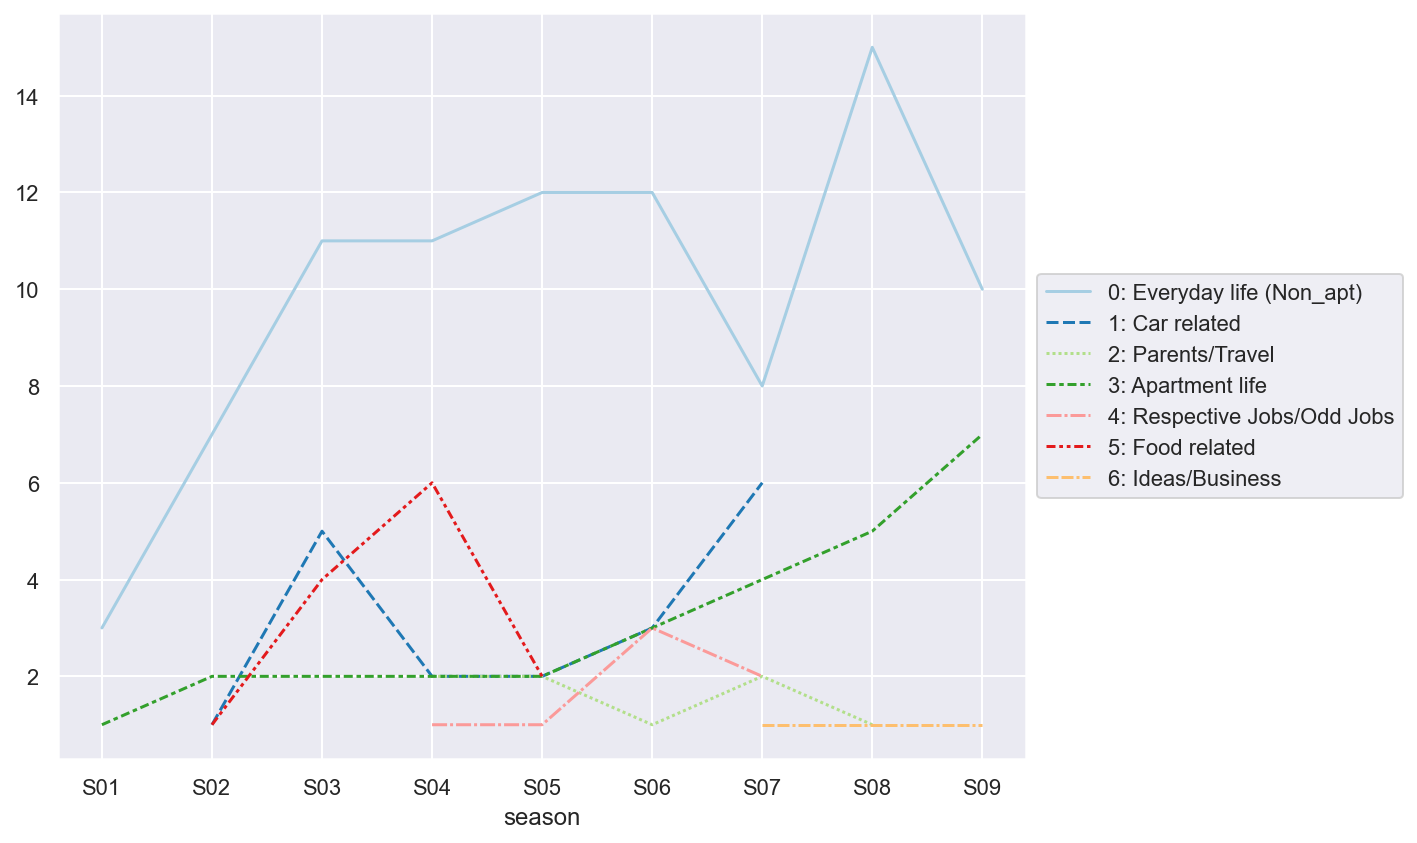

In [1439]:
sns.set(rc={'figure.figsize':(10,6)})
#sns.color_palette("vlag", as_cmap=True)

fig=plt.figure()
ax = plt.subplot(111)

sns.set_palette("Paired")
sns.lineplot(data=df_nmf_wide)

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('line_topmod_season.pdf')
plt.show()

**look at word clouds for specific topics**

### number of mentions per main characters

In [1574]:
df_nosp.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,seid,lemmatized,topic,season
0,S01E01,do you know what this be all about do you know...,0,S01
557,S01E02,so I move into the centre lane now I get ahead...,3,S01
837,S01E03,most man like work on thing tool object fix th...,0,S01
1078,S01E04,go out to dinner the other night check come at...,0,S01
1308,S02E01,I m always in traffic with the lane expert you...,0,S02


In [1576]:
seasons = ['S01','S02','S03','S04','S05','S06','S07','S08','S09']
nicknames = [['jerry', 'seinfeld'], 
             ['george', 'costanza', 'georgie','Art','Vandelay',"Can't-Stand-Ya",'Cartwright'], 
             ['elaine', 'bennis'],
             ['kramer', 'cosmo']]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1590]:
df_s1 = df_nosp[df_nosp['season']=='S01']
df_s2 = df_nosp[df_nosp['season']=='S02']
df_s3 = df_nosp[df_nosp['season']=='S03']
df_s4 = df_nosp[df_nosp['season']=='S04']
df_s5 = df_nosp[df_nosp['season']=='S05']
df_s6 = df_nosp[df_nosp['season']=='S06']
df_s7 = df_nosp[df_nosp['season']=='S07']
df_s8 = df_nosp[df_nosp['season']=='S08']
df_s9 = df_nosp[df_nosp['season']=='S09']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1613]:
char_mention = [] # list to hold the character mention totals
dflist= [df_s1,df_s2,df_s3,df_s4,df_s5,df_s6,df_s7,df_s8,df_s9]
#print(len(dflist))
season_num=0
for i in dflist: # range(len(dflist)):
    season_num+=1
    for name_list in nicknames:    # loop for each character
        mention_counter = 0        # keep track of the mentions
        for name in name_list:     # loop for each nickname
            mentions = i['lemmatized'].str.count(name).sum()
            mention_counter += mentions
        char_mention.append([name_list[0],season_num, mention_counter]) #append the name and mention count

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1614]:
char_mention

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['jerry', 1, 107],
 ['george', 1, 47],
 ['elaine', 1, 46],
 ['kramer', 1, 14],
 ['jerry', 2, 181],
 ['george', 2, 126],
 ['elaine', 2, 86],
 ['kramer', 2, 84],
 ['jerry', 3, 287],
 ['george', 3, 274],
 ['elaine', 3, 178],
 ['kramer', 3, 174],
 ['jerry', 4, 386],
 ['george', 4, 295],
 ['elaine', 4, 189],
 ['kramer', 4, 215],
 ['jerry', 5, 378],
 ['george', 5, 351],
 ['elaine', 5, 238],
 ['kramer', 5, 225],
 ['jerry', 6, 403],
 ['george', 6, 260],
 ['elaine', 6, 172],
 ['kramer', 6, 242],
 ['jerry', 7, 435],
 ['george', 7, 391],
 ['elaine', 7, 231],
 ['kramer', 7, 216],
 ['jerry', 8, 501],
 ['george', 8, 286],
 ['elaine', 8, 203],
 ['kramer', 8, 244],
 ['jerry', 9, 489],
 ['george', 9, 323],
 ['elaine', 9, 222],
 ['kramer', 9, 218]]

In [1615]:
char_mention_df = pd.DataFrame(char_mention,columns=['character','season_num','mention_counts'])
char_mention_df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,season_num,mention_counts
0,jerry,1,107
1,george,1,47
2,elaine,1,46
3,kramer,1,14
4,jerry,2,181


## visualize character mentions


In [1617]:
df_mention_wide = char_mention_df.pivot("season_num","character","mention_counts")
df_mention_wide

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


character,elaine,george,jerry,kramer
season_num,,,,
1,46,47,107,14
2,86,126,181,84
3,178,274,287,174
4,189,295,386,215
5,238,351,378,225
6,172,260,403,242
7,231,391,435,216
8,203,286,501,244
9,222,323,489,218


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


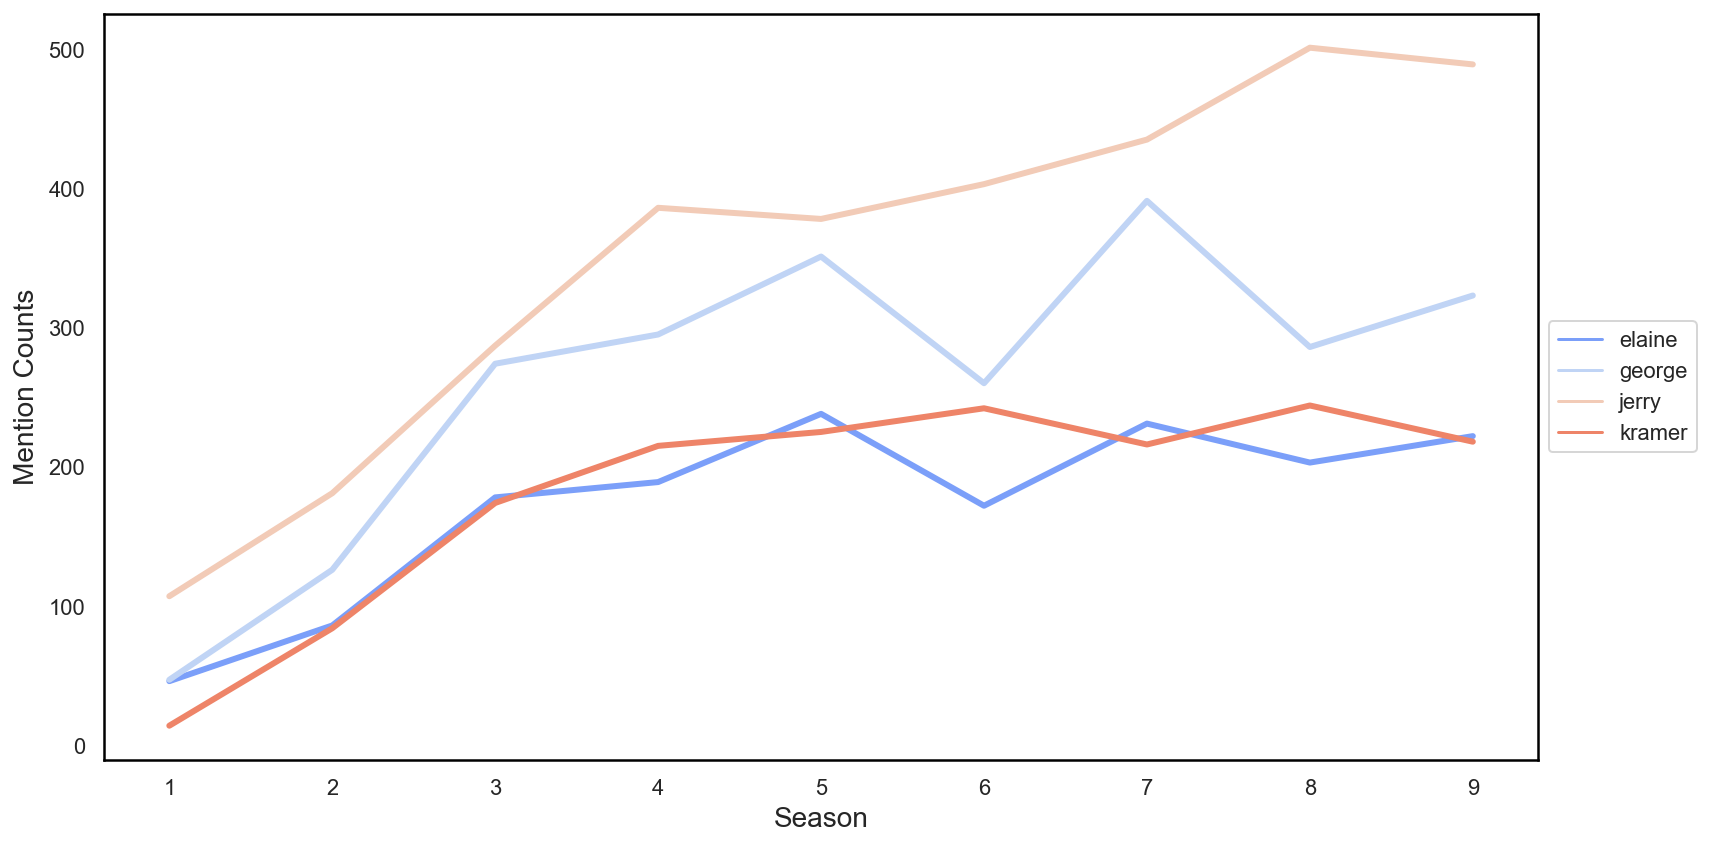

In [1672]:
%matplotlib inline
#sns.color_palette("light:b", as_cmap=True)
plt.figure(figsize = (12, 6), facecolor = 'white')
#ax = plt.axes()
ax=sns.lineplot(data=df_mention_wide,palette=sns.color_palette('coolwarm', n_colors=4),linewidth=3, dashes=False)

plt.rc('axes',edgecolor='black')
plt.ylabel('Mention Counts', fontsize=14)
plt.xlabel('Season', fontsize=14)
#ax.grid(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('line_char_mention.svg')
plt.show()

### If continuing with LDA

In [1339]:
def topic_weights_to_matrix(topic_weights, doc_ids=None, topic_ids=None):
    topic_dicts = [dict(doc) for doc in topic_weights]
    doc_to_top_mat = pd.DataFrame(topic_dicts).fillna(0)
    if doc_ids:
        doc_to_top_mat.rename(index=lambda ind: doc_ids[ind], inplace=True)
    if topic_ids:
        doc_to_top_mat.rename(columns=lambda ind: topic_ids[ind], inplace=True)
    return doc_to_top_mat

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**THis gives us an idea of the weights per topic per episode**

In [1340]:
doc_topic_matrix = topic_weights_to_matrix(lda_docs)
doc_topic_matrix

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4
0,0.280622,0.421672,0.015090,0.265616,0.017000
1,0.110231,0.236475,0.000000,0.000000,0.651624
2,0.000000,0.978544,0.013732,0.000000,0.000000
3,0.000000,0.946039,0.000000,0.000000,0.052126
4,0.266236,0.310602,0.223979,0.000000,0.192334
...,...,...,...,...,...
168,0.046414,0.000000,0.000000,0.000000,0.951882
169,0.587814,0.291385,0.050907,0.000000,0.068054
170,0.034216,0.341433,0.000000,0.455299,0.168200
171,0.226104,0.000000,0.199911,0.457317,0.115852


In [1347]:
type(doc_topic_matrix)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

**merge dataframes with topic probs to text frame**

In [1349]:
df_fin = pd.concat([df_new.reset_index(drop=True),doc_topic_matrix.reset_index(drop=True)], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1350]:
df_fin

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lemmatized,topic,0,1,2,3,4
0,do you know what this be all about do you know...,0.280622,0.280622,0.421672,0.015090,0.265616,0.017000
1,so I move into the centre lane now I get ahead...,0.110231,0.110231,0.236475,0.000000,0.000000,0.651624
2,most man like work on thing tool object fix th...,0.000000,0.000000,0.978544,0.013732,0.000000,0.000000
3,go out to dinner the other night check come at...,0.000000,0.000000,0.946039,0.000000,0.000000,0.052126
4,I m always in traffic with the lane expert you...,0.266236,0.266236,0.310602,0.223979,0.000000,0.192334
...,...,...,...,...,...,...,...
168,bookstore I read somewhere that this brentanos...,0.046414,0.046414,0.000000,0.000000,0.000000,0.951882
169,happy birthday to you thank elaine cake uh no ...,0.587814,0.587814,0.291385,0.050907,0.000000,0.068054
170,cup of tea with lemon what happen to your voic...,0.034216,0.034216,0.341433,0.000000,0.455299,0.168200
171,man I m starve how can you be hungry after wha...,0.226104,0.226104,0.000000,0.199911,0.457317,0.115852


In [1351]:
df_fin.to_csv('lda_topics.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1352]:
df_fin.topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.000000    72
0.025622     1
0.235001     1
0.233216     1
0.448452     1
            ..
0.010550     1
0.026494     1
0.162519     1
0.184187     1
0.077286     1
Name: topic, Length: 102, dtype: int64

## Topic Modeling - Nouns only

In [1481]:

# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1492]:
df_nouns = df_nosp.copy()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1493]:
df_nouns = pd.DataFrame(df_nosp['lemmatized'].apply(nouns))
df_nouns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lemmatized
0,experience life people people thing one person...
557,lane woman reason side finger thing finger per...
837,man work thing tool thing man enjoy guy drivew...
1078,night come end meal check end meal system mone...
1308,traffic lane expert type person lane choice la...
...,...
52606,bookstore brentanos place girl york health clu...
52907,birthday cake thank walter day people office d...
53205,cup tea voice heckler night time rodeo jerry g...
53569,man game ballpark food food activity paddle ba...


## Convert Nouns DF to Data for modeling


In [1494]:
data_nouns = df_nouns["lemmatized"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**LDA Model 10 topics**

In [1506]:
# LDA
doc_word, feature_names, id2word= vectorize_2(data_nouns,0.001,.25)
lda(doc_word, feature_names, id2word, 5)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
0.006*"card" + 0.003*"peterman" + 0.003*"yankee" + 0.002*"bar" + 0.002*"suit" + 0.002*"space" + 0.002*"race" + 0.002*"dog" + 0.002*"toilet" + 0.002*"bedroom" + 0.002*"pie" + 0.002*"wallet" + 0.002*"school" + 0.002*"rye" + 0.002*"desk" + 0.002*"bus" + 0.002*"beat" + 0.002*"shoe" + 0.002*"body" + 0.002*"sir" + 0.002*"alarm" + 0.002*"pocket" + 0.002*"cape" + 0.002*"clown" + 0.002*"yogurt" + 0.002*"sponge" + 0.002*"pizza" + 0.002*"list" + 0.002*"pant" + 0.002*"block" + 0.002*"candy" + 0.002*"chicken" + 0.002*"shot" + 0.002*"button" + 0.001*"meat" + 0.001*"muffin" + 0.001*"fight" + 0.001*"calzone" + 0.001*"code" + 0.001*"top" + 0.001*"fall" + 0.001*"bread" + 0.001*"bagel" + 0.001*"hmm" + 0.001*"ribbon" + 0.001*"aid" + 0.001*"grab" + 0.001*"accident" + 0.001*"dream" + 0.001*"clothe"

Topic  1
0.006*"dog" + 0.004*"mail" + 0.003*"newman" + 0.003*"card" + 0.003*"uncle" + 0.003*"cable" + 0.003*"cadillac" + 0.003*"plane" + 0.003*"blood" + 0.003*"shower" + 0.002*"bottle" + 0.002*"peterma

**NMF Topic Model Nouns**

In [1507]:
doc_word, feature_names, id2word= vectorize_2(data_nouns,.03,.75)
nmf(doc_word, feature_names,  7)


Topic  0
show, idea, life, water, plane, party, business, story, character, week, deal, today, hell, jacket, home, meeting, piece, club, excuse, course, law, pilot, date, game, help, word, matter, picture, order, talk, face, court, job, stand, health, morning, honor, case, act, bit, air, baby, care, tomorrow, fault, tonight, shoe, question, bag, person, mind, joke, fine, watch, anyone, fire, nbc, town, fact, house, prison, jury, writer, video, circus, office, cable, sport, button, milk, hair, wallet, contest, family

Topic  1
car, bar, space, candy, dollar, hell, club, point, cookie, course, window, party, face, block, job, today, city, question, hour, truck, bra, spot, somebody, bottle, baby, life, help, park, glass, parking, matter, hair, morning, week, store, gas, deal, business, hospital, arm, garage, pencil, person, drive, cent, golf, bag, turn, excuse, bit, yankee, pig, steinbrenner, cab, eye, cake, change, blood, couple, sneaker, project, listen, cadillac, wheelchair, jacket, i

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Clustering

In [1406]:
def display_cluster(X,km=[],num_clusters=0):
    alpha = 0.5
    s = 20
    color=["tomato", "orange", "yellow", "yellowgreen", "forestgreen", "skyblue", "royalblue", "darkorchid", "violet", "deeppink"]
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], alpha=alpha, s=s, c=color[6]) 
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0], X[km.labels_==i,1],alpha=alpha, s=s, c=color[i])
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], marker='x', s=100, c=color[i])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


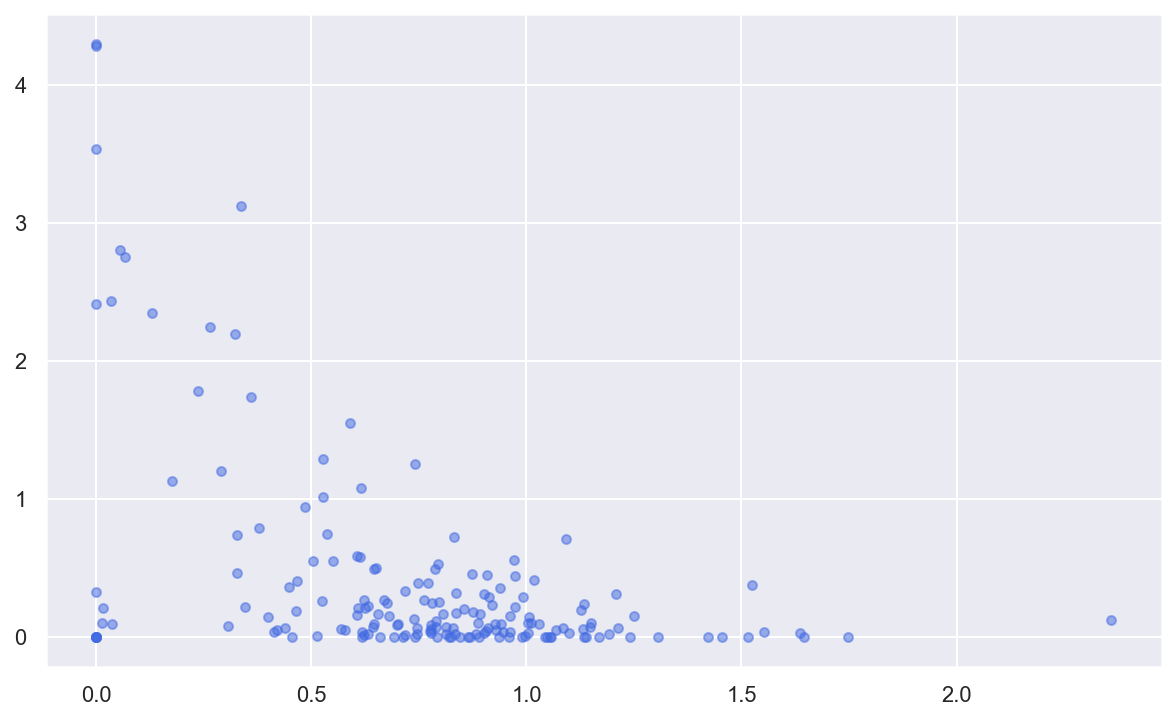

In [1407]:
display_cluster(doc_topic)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

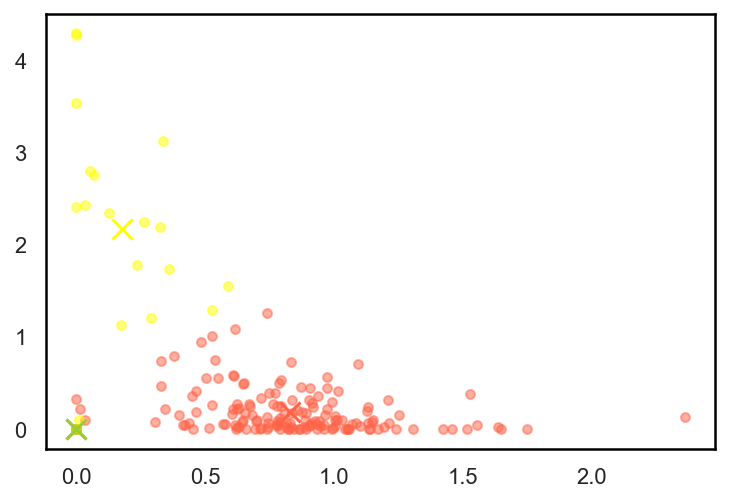

In [1670]:
from sklearn.cluster import KMeans

num_clusters = 4 # my original number of topics 
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)
plt.savefig('scatter_inertia1.svg')
plt.show

In [1409]:
km.inertia_

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


180.3683180425513

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

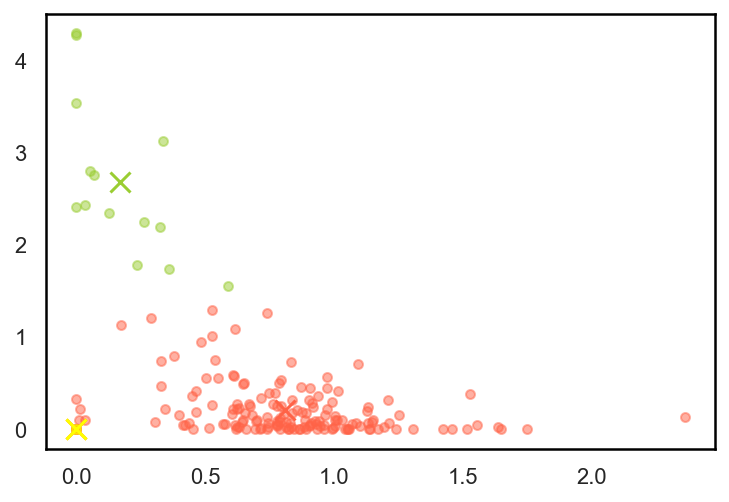

In [1669]:
num_clusters = 4 # a randomly chosen smaller number of topics based on the image above
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)
plt.savefig('scatter_inertia.svg')
plt.show

In [1411]:
km.inertia_

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


131.3684324011771

Plotting Inertia
Plotting various inertias to see the idea number of clusters and hence topics for my data.


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


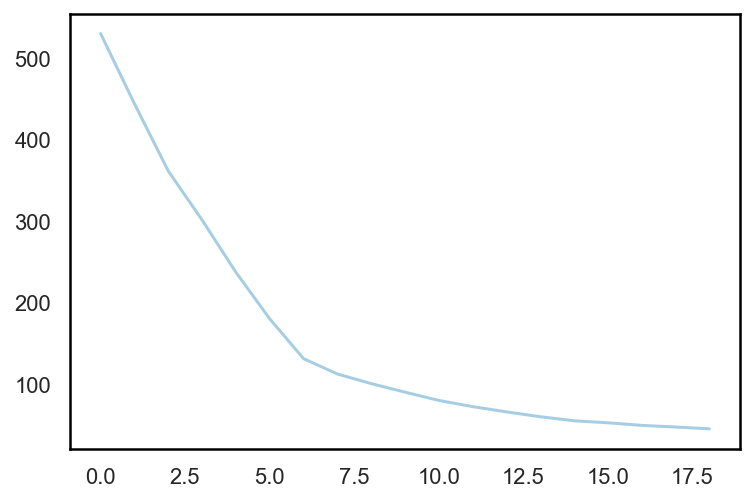

In [1668]:
import matplotlib.pyplot as plt

inertias = []
for i in range(1, 20):
    km = KMeans(n_clusters=i)
    km.fit(doc_topic)
    inertia = km.inertia_
    inertias.append(inertia)

plt.plot(inertias)
plt.savefig('line_inertia.svg')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


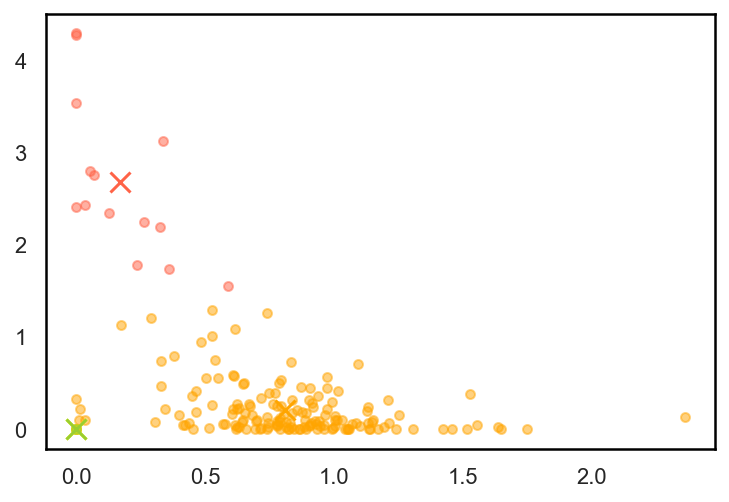

In [1674]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)
plt.savefig('cluster_topicsall.svg')
plt.show()

In [1414]:
km.inertia_

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


131.54300862056897

## PCA

Dimensionality Reduction & Visualization

See how similar or different for eadh of the seasons. Each doc has a season. Use PCA and t-SNE to reduce the doc_topic matrix's dimensions from 3  topics to 2-D space for plotting, then plot the space between all the documents. The colorization of types will then demonstrate how similar the seasons are based on their topic vectors!

In [1454]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(doc_topic)
pcafeatures = pca.transform(doc_topic)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1455]:
df_nosp['season'] = df_nosp['seid'].astype(str).str[0:3]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1456]:
df_nosp["season"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        S01
557      S01
837      S01
1078     S01
1308     S02
        ... 
52606    S09
52907    S09
53205    S09
53569    S09
53885    S09
Name: season, Length: 173, dtype: object

In [1457]:
target = df_nosp["season"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1458]:
target_names = list(target.unique())

print(doc_topic.shape)
print(pcafeatures.shape)

(173, 7)
(173, 3)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1459]:
print(len(pcafeatures))
print(len(target))

173
173


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1460]:
def plot_PCA(data, target, target_names):
    colors = cycle(['plum','dodgerblue', 'palegreen','red'])
    plt.figure(figsize=(10,10))
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1],
                   c=c, label=label, alpha=0.4, s=10)
    plt.legend()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


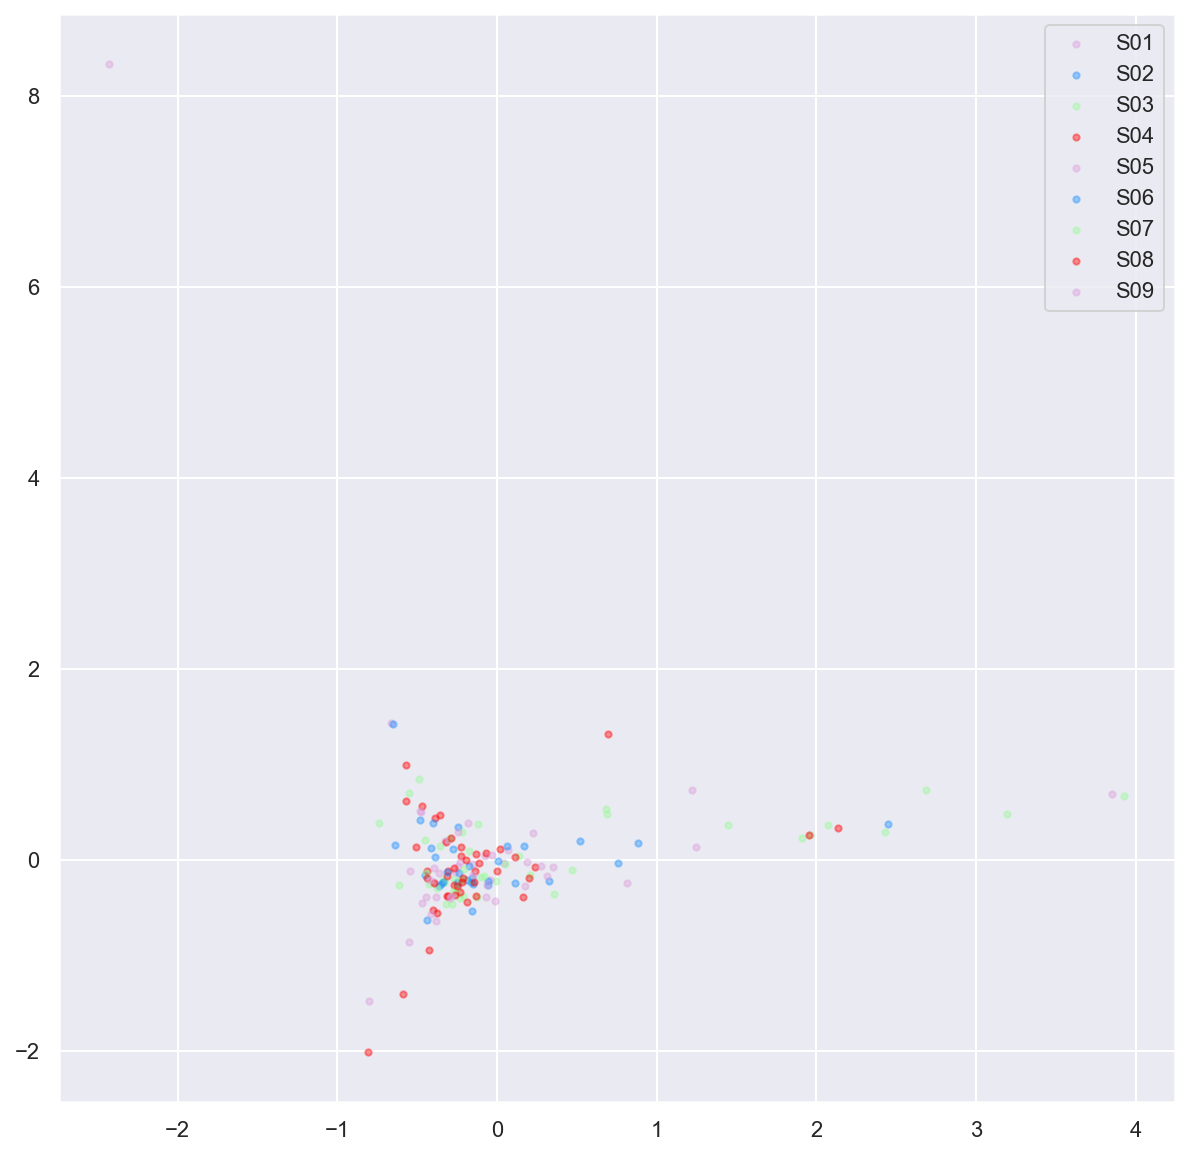

In [1461]:
plot_PCA(pcafeatures, target=target, target_names=target_names)

## t-SNE 

In [1423]:
tsne_model = TSNE(n_components=2, random_state=42)
tsne_data = tsne_model.fit_transform(doc_topic)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1452]:
def plot_tsne(data, target, target_names):
    colors = cycle(['plum','dodgerblue', 'palegreen','red'])
    for c, label in zip(colors, target_names):
        plt.scatter(tsne_data[target == label, 0], tsne_data[target == label, 1], c=c, label=label, s=20, alpha=0.5)
    plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
    plt.xlim(-10,10);



/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


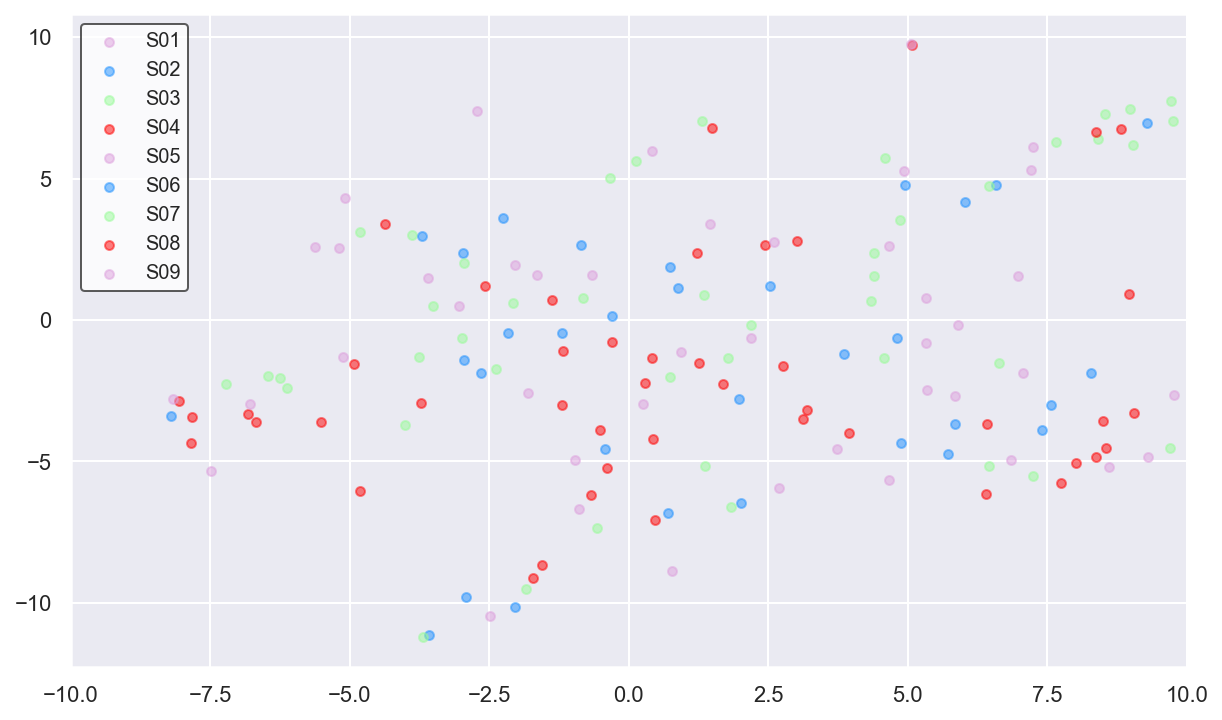

In [1453]:
plot_tsne(tsne_data, target, target_names)

In [618]:
all_topic_words = []
for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id, 30)
    topk_words = [ w for w, _ in topk ]
    all_topic_words.append(topk_words)
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: key apartment show work open break listen pick glass keep year face love day buy play turn eat night whole life home mind help new meet hold bad point dog
1: work night listen eat love next second bad game person wear day test turn lot coffee open minute hit meet mind run keep number course live wrong whole read face
2: work money car book day problem listen buy eat table away pay fine thousand coffee minute love dollar point turn first keep show new check watch excuse long wear baby
3: bald hair tape coincidence listen chinese night toe house clean bad steal second hat team work english speak love side show remember watch keep day mind pick turn minute last
4: work day bad meet turn listen apartment love car run coffee movie hell new card pick night long whole away check year hold lot minute second keep enter sound eat
5: car day year minute new meet listen work lot love last first apartment dollar check help hold show drive run long away bad wear life care turn another eat keep
6:

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [619]:
all_topic_words

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['key',
  'apartment',
  'show',
  'work',
  'open',
  'break',
  'listen',
  'pick',
  'glass',
  'keep',
  'year',
  'face',
  'love',
  'day',
  'buy',
  'play',
  'turn',
  'eat',
  'night',
  'whole',
  'life',
  'home',
  'mind',
  'help',
  'new',
  'meet',
  'hold',
  'bad',
  'point',
  'dog'],
 ['work',
  'night',
  'listen',
  'eat',
  'love',
  'next',
  'second',
  'bad',
  'game',
  'person',
  'wear',
  'day',
  'test',
  'turn',
  'lot',
  'coffee',
  'open',
  'minute',
  'hit',
  'meet',
  'mind',
  'run',
  'keep',
  'number',
  'course',
  'live',
  'wrong',
  'whole',
  'read',
  'face'],
 ['work',
  'money',
  'car',
  'book',
  'day',
  'problem',
  'listen',
  'buy',
  'eat',
  'table',
  'away',
  'pay',
  'fine',
  'thousand',
  'coffee',
  'minute',
  'love',
  'dollar',
  'point',
  'turn',
  'first',
  'keep',
  'show',
  'new',
  'check',
  'watch',
  'excuse',
  'long',
  'wear',
  'baby'],
 ['bald',
  'hair',
  'tape',
  'coincidence',
  'listen',
  'ch

## Doc: Episode, character level<br>
. Visuals for line counts total and by season

In [877]:
epchar = df.copy()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [878]:
epchar = epchar.drop(['episodeno','seid','season','episodetext','text','textmod'],axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [879]:
epchar.info

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method DataFrame.info of         character                                         lemmatized
0           jerry  do you know what this be all about do you know...
1           jerry  point at george shirt see to I that button be ...
2          george                                     be you through
3           jerry               you do of course try on when you buy
4          george  yes it be purple I like it I do nt actually re...
...           ...                                                ...
54593       jerry      grand theft auto   do nt steal any of my joke
54594  prisoner 3                      you suck   I m gon na cut you
54595       jerry  hey I do nt come down to where you work and kn...
54596       guard          alright seinfeld that s it let go come on
54597       jerry  alright hey you ve be great see you in the caf...

[54598 rows x 2 columns]>

**Total line counts per character (pre-clean) across all seasons**

In [881]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
epchar = epchar.groupby(['character'], as_index = False).count()
epchar = epchar.sort_values('lemmatized', ascending= False)
epchar.columns = ['character','lines count']
epchar = epchar.reset_index(drop = True)
epchar.iloc[:20]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,lines count
0,"""salman""",1
1,member 2,1
2,mike,1
3,mickey,1
4,michael,1
5,meryl (throws paula's clothes at jerry),1
6,meryl (not finding the opener),1
7,meryl (looking in the drawer),1
8,meryl (looking for the can opener),1
9,meryl (getting up),1


In [884]:
epchar2 = df.copy()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [885]:
#'episodeno','seid','season','episodetext','text','textmod'
epchar2 = epchar2.drop(['episodeno','seid','episodetext','text','textmod'],axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Total line counts by character per season**

In [886]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
epchar2 = epchar2.groupby(['character','season'], as_index = False).count()
epchar2 = epchar2.sort_values('lemmatized', ascending= False)
epchar2.columns = ['character','season','lines_count']
epchar2 = epchar2.reset_index(drop = True)
epchar2.iloc[:20]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,season,lines_count
0,jerry,4,2094
1,jerry,3,2001
2,jerry,7,1858
3,jerry,6,1834
4,jerry,5,1821
5,jerry,9,1793
6,jerry,8,1762
7,george,3,1463
8,george,4,1445
9,george,7,1324


**Total line counts by char per season (main chars only)**

In [894]:
nmlist = ['jerry','george','kramer','elaine'] 
  
# selecting rows based on condition 
epchar3 = epchar2[epchar2['character'].isin(nmlist)]
epchar3

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,season,lines_count
0,jerry,4,2094
1,jerry,3,2001
2,jerry,7,1858
3,jerry,6,1834
4,jerry,5,1821
5,jerry,9,1793
6,jerry,8,1762
7,george,3,1463
8,george,4,1445
9,george,7,1324


**Subtract the lines for jerry based on standup**

In [1631]:
epchar4 = epchar3.copy()
#standup=[10,24,46,48,44,48,48,44,48]
mask1 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 1)
mask2 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 2)
mask3 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 3)
mask4 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 4)
mask5 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 5)
mask6 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 6)
mask7 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 7)
mask8 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 8)
mask9 = (epchar4['character'] == 'jerry') & (epchar4['season'] == 9)
epchar4['lines_count'][mask1] = epchar4['lines_count']-10
epchar4['lines_count'][mask2] = epchar4['lines_count']-24
epchar4['lines_count'][mask3] = epchar4['lines_count']-46
epchar4['lines_count'][mask4] = epchar4['lines_count']-48
epchar4['lines_count'][mask5] = epchar4['lines_count']-44
epchar4['lines_count'][mask6] = epchar4['lines_count']-48
epchar4['lines_count'][mask7] = epchar4['lines_count']-48
epchar4['lines_count'][mask8] = epchar4['lines_count']-44
epchar4['lines_count'][mask9] = epchar4['lines_count']-48

epchar4

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-1631-ee1592b626b3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epchar4['lines_count'][mask1] = epchar4['lines_count']-10
<ipython-input-1631-ee1592b626b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epchar4['lines_count'][mask2] = epchar4['l

,character,season,lines_count
0,jerry,4,2046
1,jerry,3,1955
2,jerry,7,1810
3,jerry,6,1786
4,jerry,5,1777
5,jerry,9,1745
6,jerry,8,1718
7,george,3,1463
8,george,4,1445
9,george,7,1324


In [895]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**By char, what is the dist of line counts per season**

In [1632]:
epchar4

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,season,lines_count
0,jerry,4,2046
1,jerry,3,1955
2,jerry,7,1810
3,jerry,6,1786
4,jerry,5,1777
5,jerry,9,1745
6,jerry,8,1718
7,george,3,1463
8,george,4,1445
9,george,7,1324


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


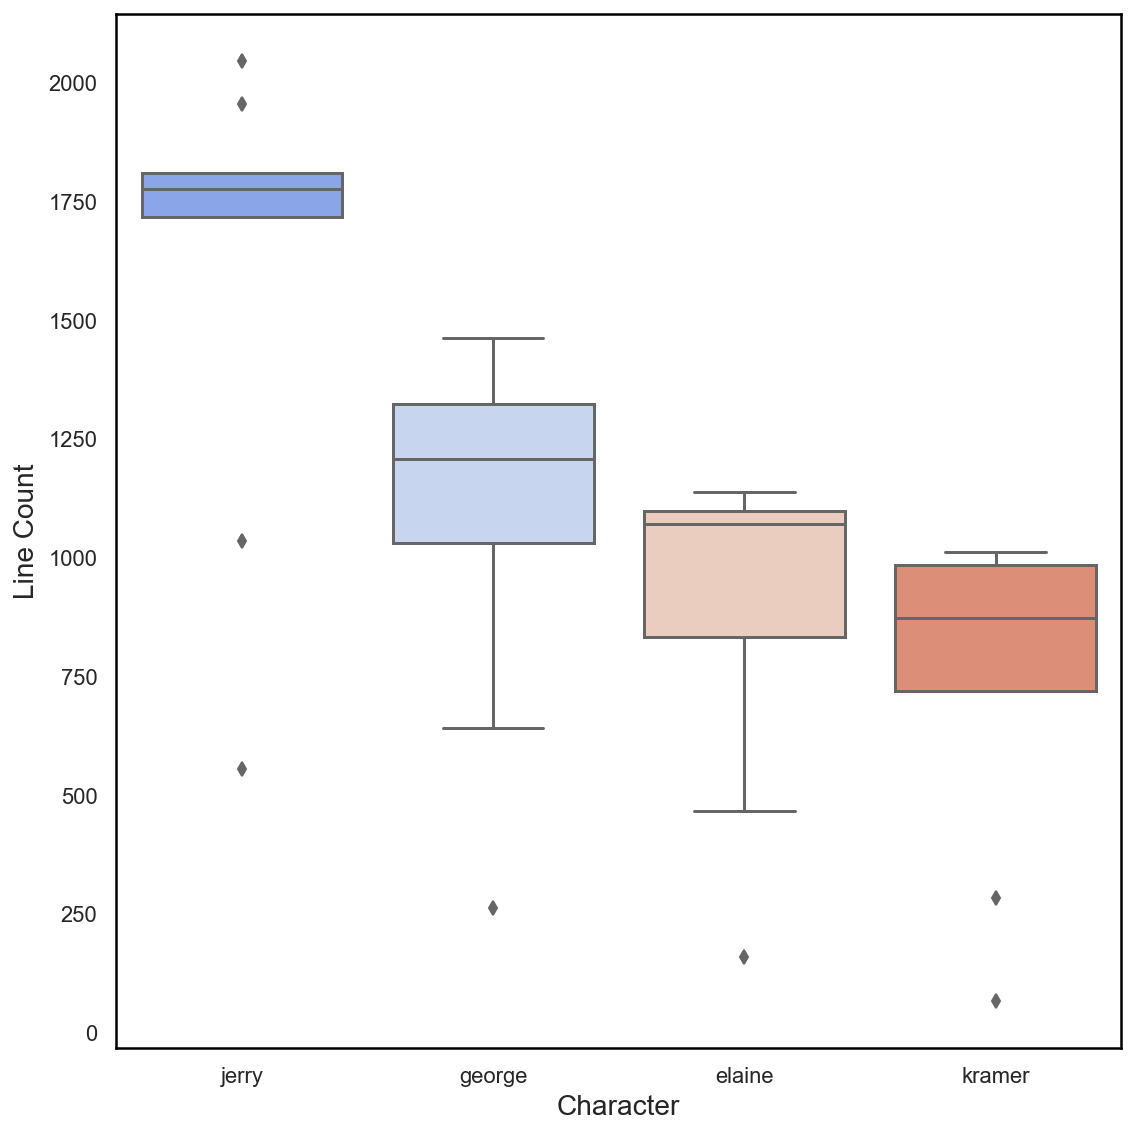

In [1661]:
plt.figure(figsize = (8, 8), facecolor = 'white')
#sns.set_palette("Paired")
ax = sns.boxplot(x="character" ,y="lines_count", data=epchar4,palette=sns.color_palette('coolwarm', n_colors=4)) # .iloc[:20])
#ax = sns.lineplot(data=df_wide,palette=sns.color_palette('coolwarm', n_colors=4))
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.ylabel('Line Count', fontsize=14)
plt.xlabel('Character', fontsize=14)
plt.tight_layout()
plt.savefig('box_charlines.svg')
plt.show()

In [1636]:
df_wide = epchar4.pivot("season","character","lines_count")
df_wide

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


character,elaine,george,jerry,kramer
season,,,,
1,158,261,554,67
2,466,642,1035,284
3,1116,1463,1955,719
4,833,1445,2046,807
5,1088,1207,1777,872
6,1099,1087,1786,909
7,1138,1324,1810,1009
8,1016,1031,1718,1012
9,1070,1248,1745,985


**subtract 2 lines from each episode per season for jerry given his lines include his standup at the beginning and end of the episodes**


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


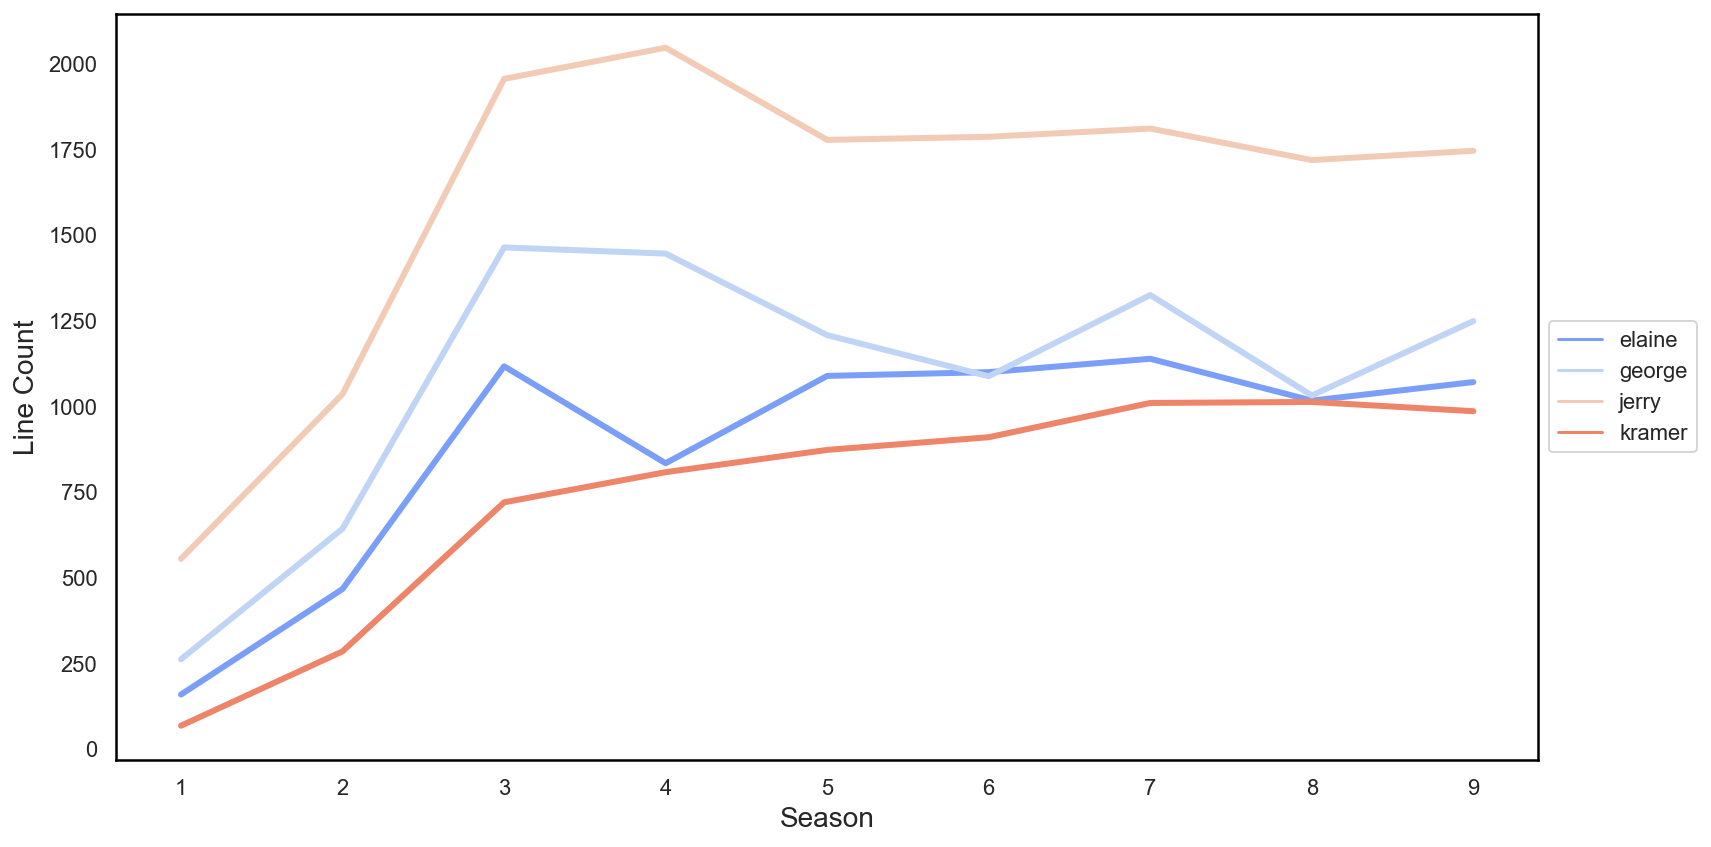

In [1671]:
%matplotlib inline
#sns.color_palette("rainbow", as_cmap=True)
plt.figure(figsize = (12, 6), facecolor = 'white')
#ax = plt.axes()
ax = sns.lineplot(data=df_wide,palette=sns.color_palette('coolwarm', n_colors=4),linewidth=3,dashes=False)
#palette=sns.color_palette('rainbow', n_colors=4), 
plt.rc('axes',edgecolor='black')
plt.ylabel('Line Count', fontsize=14)
plt.xlabel('Season', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('line_charlines.svg')
plt.show()

**Might need to get avg episodes per season to normalize these numbers**

**Idea: somehow get all text into one row of data per season/episode**

**End of program**